#Baseline Models : Synthetic Dataset-2

In this notebook we applied all baseline models to the synthetic dataset-2 to generated the predicted full causal graphs.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install cdt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.1/921.1 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7393 sha256=9fa85e6aac4abb48705c8de8dc4411a7567e19bcaff62a8880623d6416bfd393
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29253 sha256=1bdf485724df4e8a8f683e7d29058fb5a06924529a09f03084de3a4875a484e8
  Stored in directory: /root/.cache/pip/wheels/dd/67/40/683074a684607162bd0e34dcf7ccdfcab5861c3b2a83286f3a
Successfully built GPUtil skrebate


In [ ]:
import cdt

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [ ]:
data = pd.read_csv('/content/Synthetic_Dataset_2.csv')
data

,S1,S2,S3,S4,S5
0,1.333333,11.728503,9.521151,88.817696,11.422282
1,1.336667,5.985314,13.515392,97.997310,7.250459
2,1.340000,9.540038,8.629329,88.284990,8.596245
3,1.343333,7.307905,17.909555,88.817760,16.972988
4,1.346667,5.556560,11.498400,101.482820,12.353981
...,...,...,...,...,...
1995,7.983333,9.345457,9.845099,62.658295,11.933653
1996,7.986667,8.827166,11.280925,61.578533,10.647249
1997,7.990000,8.786572,11.399522,62.120853,11.058704
1998,7.993333,10.149943,8.737875,60.907352,9.786142


In [ ]:
true_full_graph = np.zeros((5,30))

true_full_graph[1,20]=1
true_full_graph[1,21]=1

true_full_graph[2,22]=1
true_full_graph[2, 6]=1

true_full_graph[3,23]=1
true_full_graph[3,12]=1
true_full_graph[3,26]=1

true_full_graph[4,19]=1
true_full_graph[4,20]=1
true_full_graph

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Preprocessing

In [ ]:
syn_data_np = data.to_numpy()

In [ ]:
sum(np.isnan(syn_data_np))

array([0, 0, 0, 0, 0])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0, 1))

syn_data_np_nor = scaler_X.fit_transform(syn_data_np)

In [ ]:
syn_data_np.shape, syn_data_np_nor.shape

((2000, 5), (2000, 5))

In [ ]:
syn_data_np = syn_data_np_nor

In [ ]:
syn_data_np_T= syn_data_np.T

In [ ]:
syn_data_pro = np.zeros((syn_data_np.shape[0]-5,5,6))
for i in range(0, (syn_data_np.shape[0]-5)):
  syn_data_pro[i,:,:]= syn_data_np_T[0:5, i:i+6]


In [ ]:
syn_data_pro[0,:,:], syn_data_np_T[0:5,0:6]

(array([[0.00000000e+00, 5.00245148e-04, 1.00049030e-03, 1.50075045e-03,
         2.00099560e-03, 2.50124075e-03],
        [5.85532768e-01, 2.18816539e-01, 4.45794081e-01, 3.03267070e-01,
         1.91439527e-01, 5.10905369e-01],
        [2.33569357e-01, 4.71248917e-01, 1.80500986e-01, 7.32726062e-01,
         3.51226672e-01, 4.83952819e-01],
        [7.34914801e-01, 9.27047133e-01, 7.23765090e-01, 7.34916141e-01,
         1.00000000e+00, 7.47235104e-01],
        [2.53104067e-01, 0.00000000e+00, 8.16487089e-02, 5.89864799e-01,
         3.09630145e-01, 2.69808187e-01]]),
 array([[0.00000000e+00, 5.00245148e-04, 1.00049030e-03, 1.50075045e-03,
         2.00099560e-03, 2.50124075e-03],
        [5.85532768e-01, 2.18816539e-01, 4.45794081e-01, 3.03267070e-01,
         1.91439527e-01, 5.10905369e-01],
        [2.33569357e-01, 4.71248917e-01, 1.80500986e-01, 7.32726062e-01,
         3.51226672e-01, 4.83952819e-01],
        [7.34914801e-01, 9.27047133e-01, 7.23765090e-01, 7.34916141e-01,
     

In [ ]:
syn_data_2d = np.expand_dims(syn_data_pro, axis =-1)
syn_data_2d.shape

(1995, 5, 6, 1)

In [ ]:
syn_data_np_4 = syn_data_np[:,0:5]
syn_data_np_4.shape

(2000, 5)

In [ ]:
data.columns

Index(['S1', 'S2', 'S3', 'S4', 'S5'], dtype='object')

In [ ]:
syn_data_4_df =pd.DataFrame(data = syn_data_np_4,
                  columns = ['S1', 'S2', 'S3', 'S4', 'S5'])

In [ ]:
syn_data_4_df.iloc[:5,:]

,S1,S2,S3,S4,S5
0,0.000000,0.585533,0.233569,0.734915,0.253104
1,0.000500,0.218817,0.471249,0.927047,0.000000
2,0.001000,0.445794,0.180501,0.723765,0.081649
3,0.001501,0.303267,0.732726,0.734916,0.589865
4,0.002001,0.191440,0.351227,1.000000,0.309630


In [ ]:
syn_data_1d = np.zeros((syn_data_np_4.shape[0]-5,30))

for i in range(0, (syn_data_np_4.shape[0]-5)):
  for j in range(0,6):
    j_end = j * syn_data_np_4.shape[1]
    syn_data_1d[i,j_end:j_end+syn_data_np_4.shape[1]]= syn_data_np_4[i+j, :]

In [ ]:
syn_data_1d.shape

(1995, 30)

In [ ]:
syn_data_np_2 = data.to_numpy()
syn_data_np_2 = syn_data_np_2[:,0:5]
syn_data_1d_nn = np.zeros((syn_data_np_2.shape[0]-5,30))

for i in range(0, (syn_data_np_2.shape[0]-5)):
  for j in range(0,6):
    j_end = j * syn_data_np_2.shape[1]
    syn_data_1d_nn[i,j_end:j_end+syn_data_np_2.shape[1]]= syn_data_np_2[i+j, :]

syn_data_1d_nn.shape

(1995, 30)

#DAG-GNN Model

We have used the code provided by the authors of the DAG-GNN model and modified the main method to apply our synthetic dataset.

In [ ]:
%cd /content

/content


In [ ]:
! git clone https://github.com/fishmoon1234/DAG-GNN

Cloning into 'DAG-GNN'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 52 (delta 4), reused 3 (delta 3), pack-reused 42
Receiving objects: 100% (52/52), 30.67 KiB | 10.22 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [ ]:
!mkdir /content/DAG-GNN/data

In [ ]:
syn_data_1d_nn.shape

(1995, 30)

In [ ]:
syn_data_1d_nn_df = pd.DataFrame(syn_data_1d_nn)

In [ ]:
syn_data_1d_nn_df.to_csv('/content/DAG-GNN/data/synthetic_data_1D_30.csv', index=False)

In [ ]:
%cd /content/DAG-GNN/src/

/content/DAG-GNN/src


In [ ]:
%%python train.py --filename=synthetic_data_1D_30 --epochs=20

Namespace(data_type='synthetic', data_filename='alarm', data_dir='data/', data_sample_size=5000, data_variable_size=100, graph_type='erdos-renyi', graph_degree=3, graph_sem_type='linear-gauss', graph_linear_type='nonlinear_2', edge_types=2, x_dims=1, z_dims=1, optimizer='Adam', graph_threshold=0.3, tau_A=0.0, lambda_A=0.0, c_A=1, use_A_connect_loss=0, use_A_positiver_loss=0, no_cuda=False, seed=42, epochs=20, batch_size=100, lr=0.003, encoder_hidden=64, decoder_hidden=64, temp=0.5, k_max_iter=100.0, encoder='mlp', decoder='mlp', no_factor=False, suffix='_springs5', encoder_dropout=0.0, decoder_dropout=0.0, save_folder='logs', filename='synthetic_data_1D_30', load_folder='', h_tol=1e-08, prediction_steps=10, lr_decay=200, gamma=1.0, skip_first=False, var=5e-05, hard=False, prior=False, dynamic_graph=False, sea_ice=True, cuda=False, factor=True)
:::: @dv: shape of dataset = (1996, 30, 1)::::
0.20659650062058788
Epoch: 0000 nll_train: 0.9588569082 kl_train: 0.1080739836 ELBO_loss: 1.06693

DAG-GNN model stores the predicted causal graphs inside the "src" directory of the code base with a file name "predG". We have to read that file to plot the predicted causal graph

In [ ]:
adja_mat = np.loadtxt('/content/DAG-GNN/src/synthetic_data_1D_30__tauA0.0__thresh0.3/predG')

In [ ]:
adja_mat.shape

(30, 30)

In [ ]:
matrix_2d_syn = adja_mat[0:,25:]

In [ ]:
matrix_2d_syn

array([[-0.     ,  0.     ,  0.     ,  0.     ],
       [ 0.00001,  0.     ,  0.     ,  0.00002],
       [-0.     ,  0.     , -0.     , -0.     ],
       [ 0.00003,  0.00003, -0.     , -0.00057],
       [ 0.00404,  0.00004,  0.     ,  0.00012],
       [ 0.02928,  0.0048 , -0.00191,  0.01517],
       [-0.00012,  0.     , -0.     ,  0.00001],
       [ 0.03808,  0.03201, -0.0106 ,  0.03451],
       [ 0.02282,  0.00001,  0.     , -0.00015],
       [ 0.00068,  0.00026, -0.00002,  0.00198],
       [ 0.01675,  0.00001,  0.     ,  0.00011],
       [ 0.02385,  0.00032, -0.     ,  0.00003],
       [ 0.00112,  0.00936, -0.00122,  0.00824],
       [ 0.00006,  0.     , -0.00003,  0.00003],
       [ 0.00026,  0.00003,  0.     ,  0.00122],
       [ 0.00568,  0.00004, -0.00204,  0.03782],
       [ 0.00318,  0.11313,  0.19908,  0.     ],
       [ 0.00046,  0.00228, -0.00268, -0.00007],
       [ 0.02027,  0.00145, -0.00051,  0.00864],
       [-0.00542, -0.00308, -0.00189,  0.04364],
       [-0.     ,  0

## Full Causal Graph

We will generate links between nodes with variable names and time lag from the adjacency matrix to plot the full causal graph.

In [ ]:
import networkx as nx
G_1 = nx.DiGraph()

nodes_1 = ["S1(t-5)", "S2(t-5)", "S3(t-5)",  "S4(t-5)", "S5(t-5)",
         "S1(t-4)", "S2(t-4)", "S3(t-4)",  "S4(t-4)",  "S5(t-4)",
         "S1(t-3)", "S2(t-3)", "S3(t-3)",  "S4(t-3)", "S5(t-3)",
         "S1(t-2)", "S2(t-2)", "S3(t-2)",  "S4(t-2)", "S5(t-2)",
         "S1(t-1)", "S2(t-1)", "S3(t-1)",  "S4(t-1)", "S5(t-1)",
         "S1(t)", "S2(t)", "S3(t)",  "S4(t)",  "S5(t)"]
nodes_r_1=["S1(t)", "S2(t)", "S3(t)",  "S4(t)",  "S5(t)"]
pred_graph_dag_f = np.zeros((5,30))
edges_1 = []

In [ ]:
for i in range (0, 30):
  G_1.add_node(nodes_1[i],pos=(int(i/5)+1,(i%5)+1))

In [ ]:
for i in range(0, 30):
  for j in range (0, 5):
    if matrix_2d_syn[i,j] > 0.01:
      print(i,j)
      G_1.add_edge(nodes_1[i], nodes_r_1[j], weight=i)
      pred_graph_dag_f[j,i]=1


0 4
1 1
2 3
3 1
3 2
6 4
17 3
20 1
20 2
26 2


In [ ]:
pos_1=nx.get_node_attributes(G_1,'pos')
pos_1

{'S1(t-5)': (1, 1),
 'S2(t-5)': (1, 2),
 'S3(t-5)': (1, 3),
 'S4(t-5)': (1, 4),
 'S5(t-5)': (1, 5),
 'S1(t-4)': (2, 1),
 'S2(t-4)': (2, 2),
 'S3(t-4)': (2, 3),
 'S4(t-4)': (2, 4),
 'S5(t-4)': (2, 5),
 'S1(t-3)': (3, 1),
 'S2(t-3)': (3, 2),
 'S3(t-3)': (3, 3),
 'S4(t-3)': (3, 4),
 'S5(t-3)': (3, 5),
 'S1(t-2)': (4, 1),
 'S2(t-2)': (4, 2),
 'S3(t-2)': (4, 3),
 'S4(t-2)': (4, 4),
 'S5(t-2)': (4, 5),
 'S1(t-1)': (5, 1),
 'S2(t-1)': (5, 2),
 'S3(t-1)': (5, 3),
 'S4(t-1)': (5, 4),
 'S5(t-1)': (5, 5),
 'S1(t)': (6, 1),
 'S2(t)': (6, 2),
 'S3(t)': (6, 3),
 'S4(t)': (6, 4),
 'S5(t)': (6, 5)}

In [ ]:
weights_1 = nx.get_edge_attributes(G_1,'weight').values()

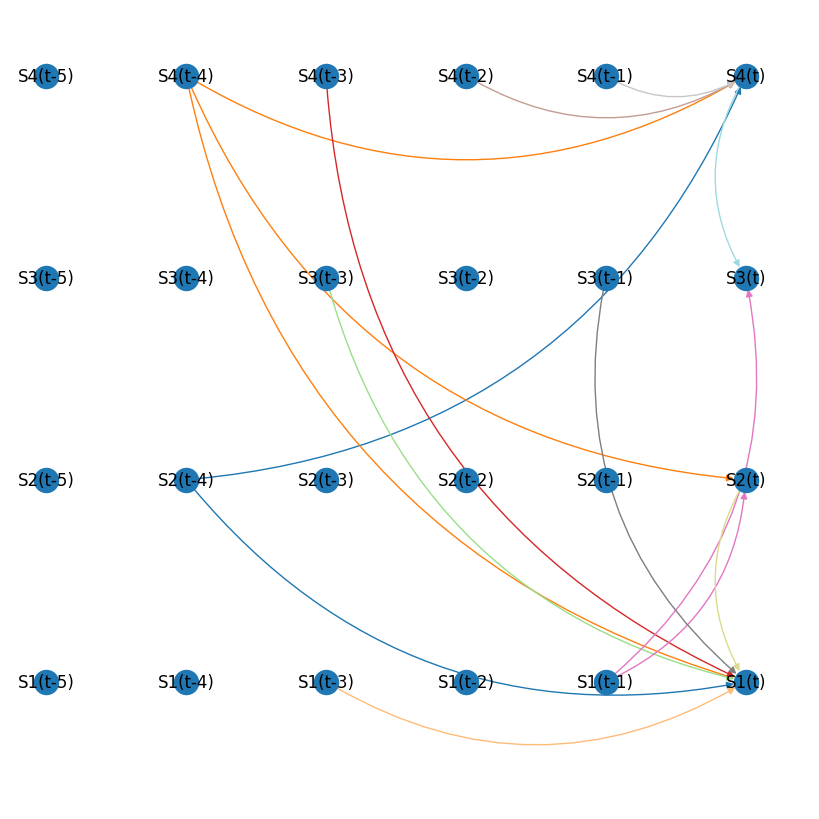

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
nx.draw(G_1, pos_1, cmap = plt.get_cmap('jet'), edge_cmap= plt.cm.tab20, edge_color=weights_1, with_labels = True, connectionstyle='arc3, rad = 0.3')
#nx.draw_networkx(G, with_labels = True)
plt.show()

In [ ]:
cdt.metrics.SHD(true_full_graph, pred_graph_dag_f)

17.0

In [ ]:
true_values = true_full_graph
predictions = pred_graph_dag_f

N = true_values.shape[1]*true_values.shape[0]
accuracy = (true_values == predictions).sum() / N
TP = ((predictions == 1) & (true_values == 1)).sum()
FP = ((predictions == 1) & (true_values == 0)).sum()
TN = ((predictions == 0) & (true_values == 0)).sum()
FN = ((predictions == 0) & (true_values == 1)).sum()
precision = TP / (TP+FP)
recall = TP / (TP + FN)
FDR = FP / (FP + TP)
F1 = 2 * (precision * recall) / (precision + recall)
print('Accuracy: {}, Precision: {}, Recall: {}, FDR: {}, F1 Score: {}'.format(accuracy, precision, recall, FDR,F1))

Accuracy: 0.8866666666666667, Precision: 0.1, Recall: 0.1111111111111111, FDR: 0.9, F1 Score: 0.10526315789473685


# PCMCI Method

The following code blocks will install the PCMCI and PCMCI+ methods from the "https://github.com/jakobrunge/tigramite" GitHub repository. This is the main code repository maintained by the author Jakob Runge.

In [ ]:
#!pip install graphviz
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
#Importing common packages
import os
import math
import glob
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import seaborn as sns
import random
import matplotlib.pyplot as plt
#Importing packages for graph generation
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
import pygraphviz as pgv
#Importing packages for Granger Causality
from dateutil.parser import parse
from scipy import signal
from scipy.interpolate import interp1d
from scipy import stats
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf, grangercausalitytests
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

#Importing packages for PCMCI

In [ ]:
#Restart runtime after successfully running this cell

!pip install dcor
!pip install matplotlib --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 26.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
! git clone https://github.com/jakobrunge/tigramite

Cloning into 'tigramite'...
remote: Enumerating objects: 7249, done.
remote: Counting objects: 100% (2226/2226), done.
remote: Compressing objects: 100% (792/792), done.
remote: Total 7249 (delta 1551), reused 1835 (delta 1426), pack-reused 5023 (from 1)
Receiving objects: 100% (7249/7249), 96.66 MiB | 11.64 MiB/s, done.
Resolving deltas: 100% (4939/4939), done.


In [ ]:
%cd tigramite

/content/DAG-GNN/src/tigramite


In [ ]:
!python setup.py install

running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https

In [ ]:
# Imports
import numpy as np
import matplotlib
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI
from tigramite.independence_tests.parcorr import ParCorr #, GPDC, CMIknn, CMIsymb

from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS
#from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI

##Create and apply the PCMCI model

In [ ]:
syn_data_4_df.columns

Index(['S1', 'S2', 'S3', 'S4', 'S5'], dtype='object')

In [ ]:
# copy variable names from data file to define dataframe
var_name = ['S1', 'S2', 'S3', 'S4', 'S5']
np_features = syn_data_4_df.to_numpy()

df_all_data_v = pp.DataFrame(np_features, var_names = var_name)

In [ ]:
parcorr = ParCorr(significance='analytic')
#pcmci = PCMCI(dataframe=df_all_data_v, cond_ind_test=RobustParCorr(), verbosity = 1)
pcmci = PCMCI(
    dataframe=df_all_data_v,
    cond_ind_test=parcorr,
    verbosity=1)

tau_max = 5
pc_alpha = 0.1
alpha_level = 0.01
results_pcmci = pcmci.run_pcmci(tau_max = tau_max, pc_alpha = None, alpha_level = alpha_level)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 5
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable S1 has 7 link(s):
    [pc_alpha = 0.1]
        (S1 -4): max_pval = 0.00000, |min_val| =  0.467
        (S1 -2): max_pval = 0.00000, |min_val| =  0.352
        (S1 -1): max_pval = 0.00000, |min_val| =  0.137
        (S1 -3): max_pval = 0.00001, |min_val| =  0.101
        (S1 -5): max_pval = 0.00381, |min_val| =  0.065
        (S3 -5): max_pval = 0.07380, |min_val| =  0.040
        (S3 -3): max_pval = 0.08811, |min_val| =  0.038

    Variable S2 has 9 link(s):
    [pc_alpha = 0.4]
        (S2 -2): max_pval = 0.00000, |min_val| =  0.217
        (S2 -4): max_pval = 0.00000, |min_val| =  0.151
        (S5 -4): max_pval = 0.00003, |min_val| =  0.094
        (S4 -2): max_pval = 0.00026, |min_val| =  0.082
        (S5 -3): max

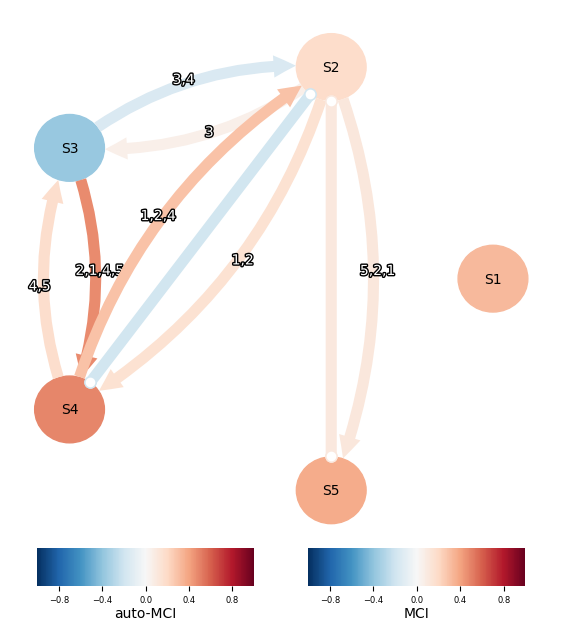

In [ ]:
tp.plot_graph(graph=results_pcmci['graph'],
              val_matrix=results_pcmci['val_matrix'],
              var_names = var_name,
              figsize = (7,7))
plt.show()

## Full Causal Graph

In [ ]:
results_pcmci['graph']

array([[['', '-->', '', '-->', '-->', '-->'],
        ['', '', '', '', '', ''],
        ['', '', '', '', '', ''],
        ['', '', '', '', '', ''],
        ['', '', '', '', '', '']],

       [['', '', '', '', '', ''],
        ['', '', '-->', '-->', '-->', ''],
        ['', '', '', '-->', '', ''],
        ['o-o', '-->', '-->', '', '', ''],
        ['o-o', '-->', '-->', '', '', '-->']],

       [['', '', '', '', '', ''],
        ['', '', '', '-->', '-->', ''],
        ['', '-->', '-->', '', '', ''],
        ['', '-->', '-->', '', '-->', '-->'],
        ['', '', '', '', '', '']],

       [['', '', '', '', '', ''],
        ['o-o', '-->', '-->', '', '-->', ''],
        ['', '', '', '', '-->', '-->'],
        ['', '-->', '-->', '-->', '-->', '-->'],
        ['', '', '', '', '', '']],

       [['', '', '', '', '', ''],
        ['o-o', '', '', '', '', ''],
        ['', '', '', '', '', ''],
        ['', '', '', '', '', ''],
        ['', '', '-->', '', '-->', '']]], dtype='<U3')

In [ ]:
pcmci_res = results_pcmci['graph']
pcmci_full_graph = np.zeros((5,30))
for i in range(0, 5):
  for j in range (0, 5):
    for l in range (0, 6):
      if pcmci_res[i,j,l] == '-->' or pcmci_res[i,j,l] == '<--':
        k = i +5*(5-l)
        pcmci_full_graph[j,k]=1

In [ ]:
matrix_2d_2d = pcmci_full_graph

In [ ]:
import networkx as nx
G_2d = nx.DiGraph()

nodes_2d = ["S1(t-5)", "S2(t-5)", "S3(t-5)",  "S4(t-5)", "S5(t-5)",
         "S1(t-4)", "S2(t-4)", "S3(t-4)",  "S4(t-4)",  "S5(t-4)",
         "S1(t-3)", "S2(t-3)", "S3(t-3)",  "S4(t-3)", "S5(t-3)",
         "S1(t-2)", "S2(t-2)", "S3(t-2)",  "S4(t-2)", "S5(t-2)",
         "S1(t-1)", "S2(t-1)", "S3(t-1)",  "S4(t-1)", "S5(t-1)",
         "S1(t)", "S2(t)", "S3(t)",  "S4(t)",  "S5(t)"]
nodes_r_2d=["S1(t)", "S2(t)", "S3(t)",  "S4(t)",  "S5(t)"]
edges_2d = []


In [ ]:
for i in range (0, 30):
  G_2d.add_node(nodes_2d[i],pos=(int(i/5)+1,(i%5)+1))

In [ ]:
for i in range(0, 30):
  for j in range (0, 5):
    if matrix_2d_2d[j,i] > 0.2:
      #print(i,j)
      G_2d.add_edge(nodes_2d[i], nodes_r_2d[j], weight=i)


In [ ]:
pos_2d=nx.get_node_attributes(G_2d,'pos')
#pos_2d

In [ ]:
weights_2d = nx.get_edge_attributes(G_2d,'weight').values()

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


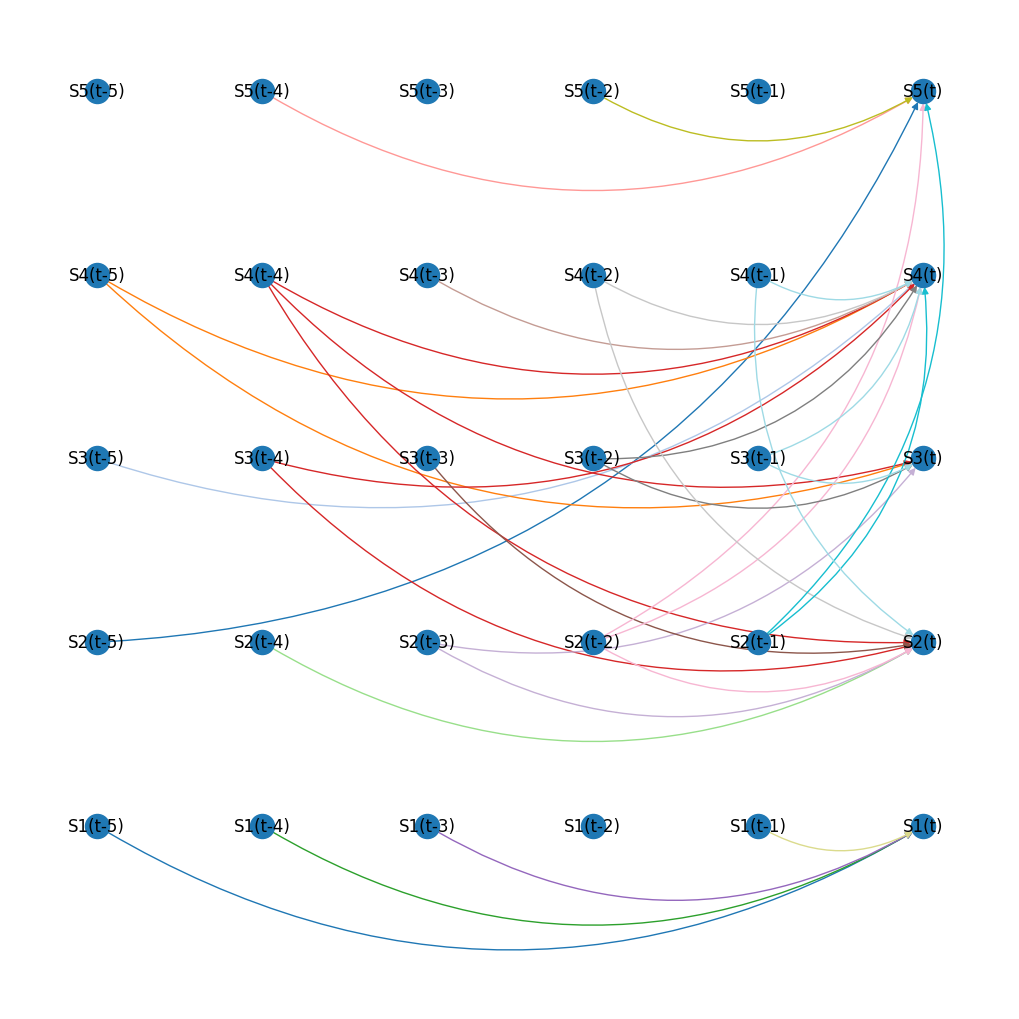

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
nx.draw(G_2d, pos_2d, cmap = plt.get_cmap('jet'), edge_cmap= plt.cm.tab20, edge_color=weights_2d, with_labels = True, connectionstyle='arc3, rad = 0.3')
#nx.draw_networkx(G, with_labels = True)
plt.show()

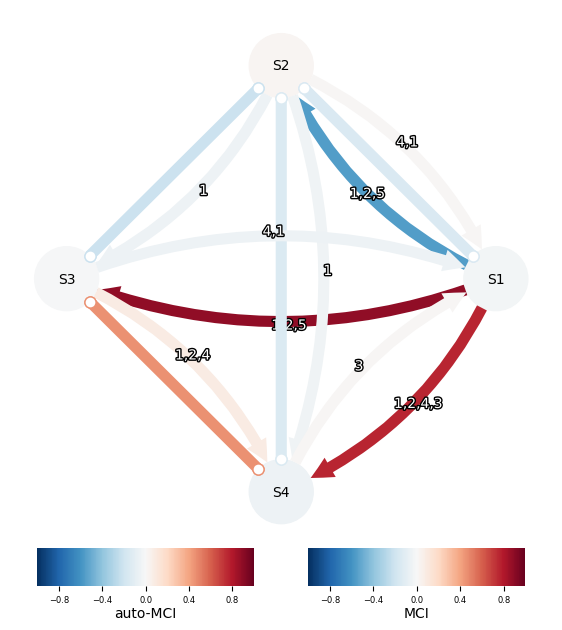

In [ ]:
tp.plot_graph(graph=results_pcmci['graph'],
              val_matrix=results_pcmci['val_matrix'],
              var_names = var_name,
              figsize = (7,7))
plt.show()

In [ ]:
cdt.metrics.SHD(true_full_graph, pcmci_full_graph)

36.0

In [ ]:
true_values = true_full_graph
predictions = pcmci_full_graph

N = true_values.shape[1]*true_values.shape[0]
accuracy = (true_values == predictions).sum() / N
TP = ((predictions == 1) & (true_values == 1)).sum()
FP = ((predictions == 1) & (true_values == 0)).sum()
TN = ((predictions == 0) & (true_values == 0)).sum()
FN = ((predictions == 0) & (true_values == 1)).sum()
precision = TP / (TP+FP)
recall = TP / (TP + FN)
FDR = FP / (FP + TP)
F1 = 2 * (precision * recall) / (precision + recall)
print('Accuracy: {}, Precision: {}, Recall: {}, FDR: {}, F1 Score: {}'.format(accuracy, precision, recall, FDR,F1))

Accuracy: 0.76, Precision: 0.09090909090909091, Recall: 0.3333333333333333, FDR: 0.9090909090909091, F1 Score: 0.14285714285714288


# PCMCI+ Method

To apply the PCMCI+ method first we have to execute the PCMCI method. Then we have to call the PCMCI+ method using the same instance object the main "pcmci" class.

In [ ]:
results_plus = pcmci.run_pcmciplus(tau_max = tau_max, pc_alpha = None)


##
## Optimizing pc_alpha over pc_alpha_list = [0.001, 0.005, 0.01, 0.025, 0.05]
##

## pc_alpha = 0.001 (1/5):

##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 5
pc_alpha = [0.001]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable S1 has 4 link(s):
        (S1 -4): max_pval = 0.00000, |min_val| =  0.467
        (S1 -2): max_pval = 0.00000, |min_val| =  0.352
        (S1 -1): max_pval = 0.00000, |min_val| =  0.137
        (S1 -3): max_pval = 0.00001, |min_val| =  0.101

    Variable S2 has 6 link(s):
        (S2 -2): max_pval = 0.00000, |min_val| =  0.306
        (S2 -4): max_pval = 0.00000, |min_val| =  0.187
        (S5 -3): max_pval = 0.00000, |min_val| =  0.175
        (S5 -4): max_pval = 0.00000, |min_val| =  0.105
        (S4 -2): max_pval = 0.00009, |min_val| =  0.088
        (S5 -2): max_pval = 0.00024, |min_val| =  0.082

    Variable S3 has 4 link(s

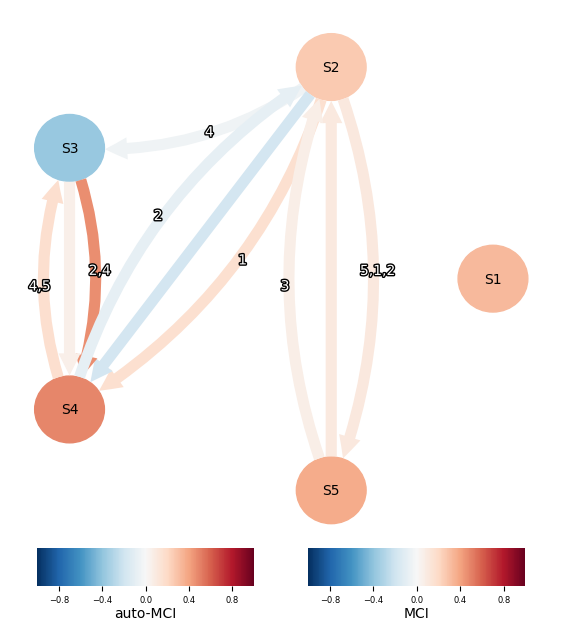

In [ ]:
tp.plot_graph(graph=results_plus['graph'],
              val_matrix=results_plus['val_matrix'],
              var_names = var_name,
              figsize = (7,7))
plt.show()

##Full Causal Graph

In [ ]:
results_plus['graph']

array([[['', '-->', '', '-->', '-->', '-->'],
        ['', '', '', '', '', ''],
        ['', '', '', '', '', ''],
        ['', '', '', '', '', ''],
        ['', '', '', '', '', '']],

       [['', '', '', '', '', ''],
        ['', '', '-->', '', '-->', ''],
        ['', '', '', '', '-->', ''],
        ['-->', '-->', '', '', '', ''],
        ['<--', '-->', '-->', '', '', '-->']],

       [['', '', '', '', '', ''],
        ['', '', '', '', '', ''],
        ['', '-->', '', '', '', ''],
        ['-->', '', '-->', '', '-->', ''],
        ['', '', '', '', '', '']],

       [['', '', '', '', '', ''],
        ['<--', '', '-->', '', '', ''],
        ['<--', '', '', '', '-->', '-->'],
        ['', '-->', '-->', '-->', '-->', ''],
        ['', '', '', '', '', '']],

       [['', '', '', '', '', ''],
        ['-->', '', '', '-->', '', ''],
        ['', '', '', '', '', ''],
        ['', '', '', '', '', ''],
        ['', '', '-->', '', '-->', '']]], dtype='<U3')

In [ ]:
results_plus['val_matrix']

array([[[ 0.        ,  0.14674859, -0.01568982, -0.06193847,
          0.32051228, -0.07328549],
        [ 0.02735908,  0.0354636 ,  0.0354636 ,  0.0354636 ,
          0.0354636 ,  0.0354636 ],
        [-0.02609622, -0.00923902, -0.00923902, -0.00923902,
         -0.00923902, -0.00923902],
        [-0.00338526, -0.00327557,  0.00327556,  0.01749108,
          0.03307965,  0.00778941],
        [ 0.0069298 ,  0.01704107,  0.01704107,  0.01704107,
          0.01704107,  0.01704107]],

       [[ 0.02735908, -0.00134494,  0.01109674, -0.00111739,
         -0.00653652,  0.0185995 ],
        [ 0.        ,  0.04368528,  0.26252288,  0.02752974,
          0.11010199,  0.03728887],
        [ 0.01833271, -0.02650237,  0.0086123 , -0.00982557,
         -0.0455677 , -0.02024298],
        [-0.18130266,  0.15723383, -0.01019071,  0.01103926,
         -0.04370853,  0.02423199],
        [ 0.09755813,  0.06974804,  0.06556968,  0.02561843,
          0.0171834 ,  0.10723848]],

       [[-0.02609622, -0.0

In [ ]:
results_plus['graph'].shape

(5, 5, 6)

In [ ]:
pcmci_plus = results_plus['graph']
pcmci_plus_full_graph = np.zeros((5,30))
for i in range(0, 5):
  for j in range (0, 5):
    for l in range (0, 6):
      if pcmci_plus[i,j,l] == '-->' or pcmci_plus[i,j,l] == '<--':
        k = i +5*(5-l)
        pcmci_plus_full_graph[j,k]=1

In [ ]:
pcmci_plus_full_graph

array([[1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [ ]:
np.savetxt('/content/pcmci-plus-full-adj-mat-syn-v1.csv', pcmci_plus_full_graph, delimiter=",")

In [ ]:
matrix_2d_2d_s = pcmci_plus_full_graph

In [ ]:
import networkx as nx
G_2d_s = nx.DiGraph()

nodes_2d_s = ["S1(t-5)", "S2(t-5)", "S3(t-5)",  "S4(t-5)", "S5(t-5)",
         "S1(t-4)", "S2(t-4)", "S3(t-4)",  "S4(t-4)",  "S5(t-4)",
         "S1(t-3)", "S2(t-3)", "S3(t-3)",  "S4(t-3)", "S5(t-3)",
         "S1(t-2)", "S2(t-2)", "S3(t-2)",  "S4(t-2)", "S5(t-2)",
         "S1(t-1)", "S2(t-1)", "S3(t-1)",  "S4(t-1)", "S5(t-1)",
         "S1(t)", "S2(t)", "S3(t)",  "S4(t)",  "S5(t)"]
nodes_r_2d_s=["S1(t)", "S2(t)", "S3(t)",  "S4(t)",  "S5(t)"]
edges_2d = []


In [ ]:
for i in range (0, 30):
  G_2d_s.add_node(nodes_2d_s[i],pos=(int(i/5)+1,(i%5)+1))

In [ ]:
for i in range(0, 30):
  for j in range (0, 5):
    if matrix_2d_2d_s[j,i] > 0.2:
      #print(i,j)
      G_2d_s.add_edge(nodes_2d_s[i], nodes_r_2d_s[j], weight=i)


In [ ]:
pos_2d_s=nx.get_node_attributes(G_2d_s,'pos')
#pos_2d_s

In [ ]:
weights_2d_s = nx.get_edge_attributes(G_2d_s,'weight').values()

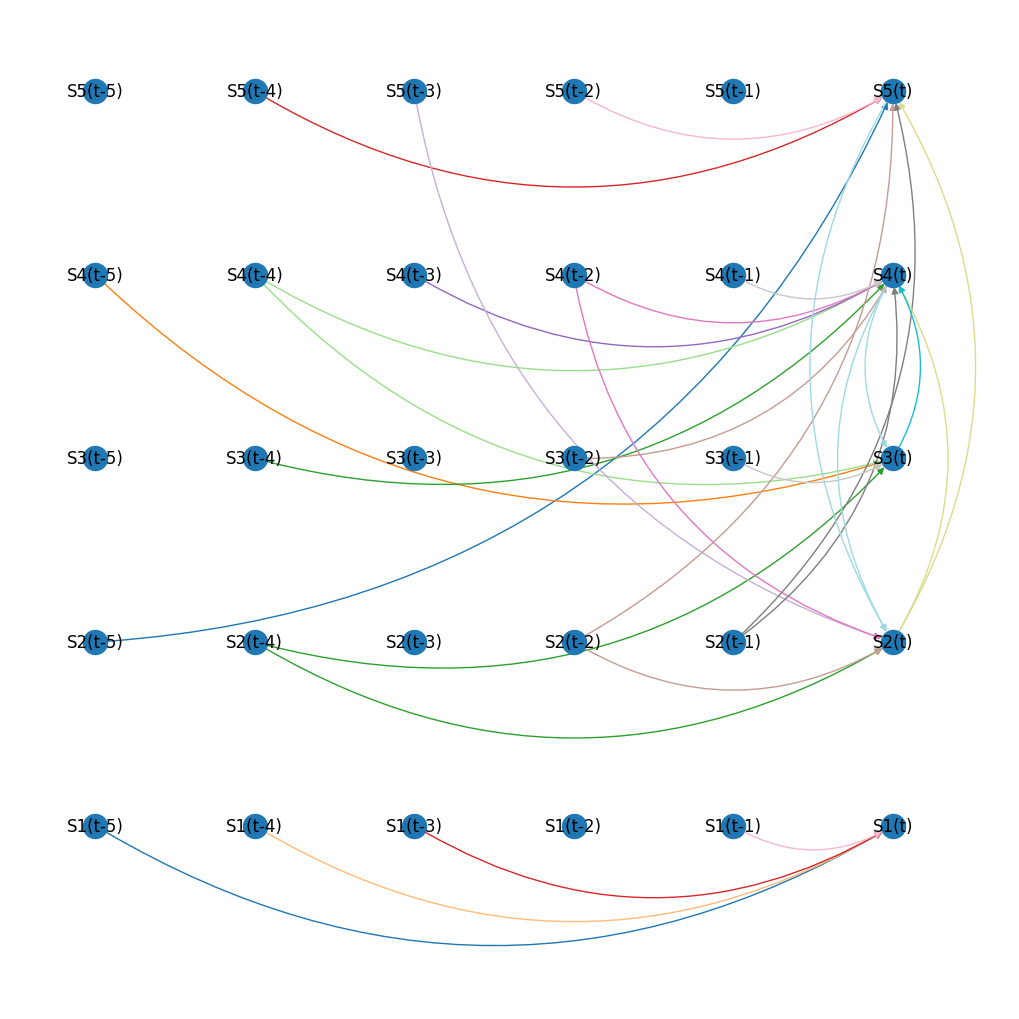

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
nx.draw(G_2d_s, pos_2d_s, cmap = plt.get_cmap('jet'), edge_cmap= plt.cm.tab20, edge_color=weights_2d_s, with_labels = True, connectionstyle='arc3, rad = 0.3')
#nx.draw_networkx(G, with_labels = True)
plt.show()

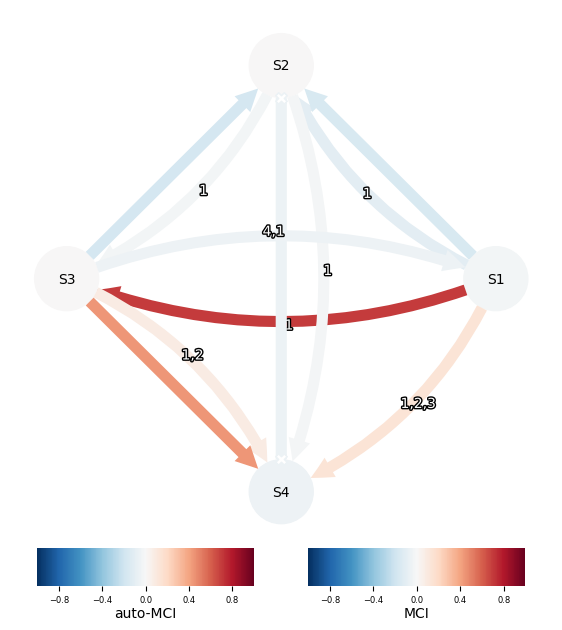

In [ ]:
tp.plot_graph(graph=results_plus['graph'],
              val_matrix=results_plus['val_matrix'],
              var_names = var_name,
              figsize = (7,7))
plt.show()

In [ ]:
cdt.metrics.SHD(true_full_graph, pcmci_plus_full_graph)

29.0

In [ ]:
true_values = true_full_graph
predictions = pcmci_plus_full_graph

N = true_values.shape[1]*true_values.shape[0]
accuracy = (true_values == predictions).sum() / N
TP = ((predictions == 1) & (true_values == 1)).sum()
FP = ((predictions == 1) & (true_values == 0)).sum()
TN = ((predictions == 0) & (true_values == 0)).sum()
FN = ((predictions == 0) & (true_values == 1)).sum()
precision = TP / (TP+FP)
recall = TP / (TP + FN)
FDR = FP / (FP + TP)
F1 = 2 * (precision * recall) / (precision + recall)
print('Accuracy: {}, Precision: {}, Recall: {}, FDR: {}, F1 Score: {}'.format(accuracy, precision, recall, FDR,F1))

Accuracy: 0.8066666666666666, Precision: 0.16666666666666666, Recall: 0.5555555555555556, FDR: 0.8333333333333334, F1 Score: 0.2564102564102564


#NOTEARS-MLP Model

DAGs with NO TEARS

In [ ]:
%cd /content

/content


In [ ]:
! git clone https://github.com/xunzheng/notears

Cloning into 'notears'...
remote: Enumerating objects: 207, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 207 (delta 27), reused 25 (delta 24), pack-reused 170 (from 1)
Receiving objects: 100% (207/207), 77.79 KiB | 3.11 MiB/s, done.
Resolving deltas: 100% (101/101), done.


In [ ]:
%cd notears

/content/notears


In [ ]:
!python setup.py install

running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https

In [ ]:
%cd ..

/content


In [ ]:
!pip uninstall texttable python-igraph igraph --y

Found existing installation: texttable 1.7.0
Uninstalling texttable-1.7.0:
  Successfully uninstalled texttable-1.7.0
Found existing installation: python-igraph 0.11.6
Uninstalling python-igraph-0.11.6:
  Successfully uninstalled python-igraph-0.11.6
Found existing installation: igraph 0.11.6
Uninstalling igraph-0.11.6:
  Successfully uninstalled igraph-0.11.6


In [ ]:
!apt install libcairo2-dev
!pip install pycairo

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libblkid-dev libblkid1 libcairo-script-interpreter2 libffi-dev libglib2.0-dev libglib2.0-dev-bin
  libice-dev liblzo2-2 libmount-dev libmount1 libpixman-1-dev libselinux1-dev libsepol-dev
  libsm-dev libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin | libgdk-pixbuf2.0-dev
  libxml2-utils libice-doc cryptsetup-bin libsm-doc
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libcairo2-dev libffi-dev libglib2.0-dev
  libglib2.0-dev-bin libice-dev liblzo2-2 libmount-dev libpixman-1-dev libselinux1-dev libsepol-dev
  libsm-dev libxcb-render0-dev libxcb-shm0-dev
The following packages will be upgraded:
  libblkid1 libmount1
2 upgraded, 15 newly installed, 0 to remove and 47 not upgraded.
Need to get 4,068 kB of archives.
Afte

In [ ]:
!pip install python-igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.9 MB/s eta 0:00:00


In [ ]:
import igraph as ig

## Non-Linear relationships

In [ ]:
%cd /content/notears

/content/notears


In [ ]:
# If the import statements do not work, please use the commented statements.

#from notears.notears.linear import notears_linear
#from notears.notears import utils


from notears.linear import notears_linear
from notears import utils

In [ ]:
# If first 3 import statements do not work, please use the commented statements.


#from notears.notears.locally_connected import LocallyConnected
#from notears.notears.lbfgsb_scipy import LBFGSBScipy
#from notears.notears.trace_expm import trace_expm



from notears.locally_connected import LocallyConnected
from notears.lbfgsb_scipy import LBFGSBScipy
from notears.trace_expm import trace_expm
import torch
import torch.nn as nn
import numpy as np
import math


class NotearsMLP(nn.Module):
    def __init__(self, dims, bias=True):
        super(NotearsMLP, self).__init__()
        assert len(dims) >= 2
        assert dims[-1] == 1
        d = dims[0]
        self.dims = dims
        # fc1: variable splitting for l1
        self.fc1_pos = nn.Linear(d, d * dims[1], bias=bias)
        self.fc1_neg = nn.Linear(d, d * dims[1], bias=bias)
        self.fc1_pos.weight.bounds = self._bounds()
        self.fc1_neg.weight.bounds = self._bounds()
        # fc2: local linear layers
        layers = []
        for l in range(len(dims) - 2):
            layers.append(LocallyConnected(d, dims[l + 1], dims[l + 2], bias=bias))
        self.fc2 = nn.ModuleList(layers)

    def _bounds(self):
        d = self.dims[0]
        bounds = []
        for j in range(d):
            for m in range(self.dims[1]):
                for i in range(d):
                    if i == j:
                        bound = (0, 0)
                    else:
                        bound = (0, None)
                    bounds.append(bound)
        return bounds

    def forward(self, x):  # [n, d] -> [n, d]
        x = self.fc1_pos(x) - self.fc1_neg(x)  # [n, d * m1]
        x = x.view(-1, self.dims[0], self.dims[1])  # [n, d, m1]
        for fc in self.fc2:
            x = torch.sigmoid(x)  # [n, d, m1]
            x = fc(x)  # [n, d, m2]
        x = x.squeeze(dim=2)  # [n, d]
        return x

    def h_func(self):
        """Constrain 2-norm-squared of fc1 weights along m1 dim to be a DAG"""
        d = self.dims[0]
        fc1_weight = self.fc1_pos.weight - self.fc1_neg.weight  # [j * m1, i]
        fc1_weight = fc1_weight.view(d, -1, d)  # [j, m1, i]
        A = torch.sum(fc1_weight * fc1_weight, dim=1).t()  # [i, j]
        h = trace_expm(A) - d  # (Zheng et al. 2018)
        # A different formulation, slightly faster at the cost of numerical stability
        # M = torch.eye(d) + A / d  # (Yu et al. 2019)
        # E = torch.matrix_power(M, d - 1)
        # h = (E.t() * M).sum() - d
        return h

    def l2_reg(self):
        """Take 2-norm-squared of all parameters"""
        reg = 0.
        fc1_weight = self.fc1_pos.weight - self.fc1_neg.weight  # [j * m1, i]
        reg += torch.sum(fc1_weight ** 2)
        for fc in self.fc2:
            reg += torch.sum(fc.weight ** 2)
        return reg

    def fc1_l1_reg(self):
        """Take l1 norm of fc1 weight"""
        reg = torch.sum(self.fc1_pos.weight + self.fc1_neg.weight)
        return reg

    @torch.no_grad()
    def fc1_to_adj(self) -> np.ndarray:  # [j * m1, i] -> [i, j]
        """Get W from fc1 weights, take 2-norm over m1 dim"""
        d = self.dims[0]
        fc1_weight = self.fc1_pos.weight - self.fc1_neg.weight  # [j * m1, i]
        fc1_weight = fc1_weight.view(d, -1, d)  # [j, m1, i]
        A = torch.sum(fc1_weight * fc1_weight, dim=1).t()  # [i, j]
        W = torch.sqrt(A)  # [i, j]
        W = W.cpu().detach().numpy()  # [i, j]
        return W


class NotearsSobolev(nn.Module):
    def __init__(self, d, k):
        """d: num variables k: num expansion of each variable"""
        super(NotearsSobolev, self).__init__()
        self.d, self.k = d, k
        self.fc1_pos = nn.Linear(d * k, d, bias=False)  # ik -> j
        self.fc1_neg = nn.Linear(d * k, d, bias=False)
        self.fc1_pos.weight.bounds = self._bounds()
        self.fc1_neg.weight.bounds = self._bounds()
        nn.init.zeros_(self.fc1_pos.weight)
        nn.init.zeros_(self.fc1_neg.weight)
        self.l2_reg_store = None

    def _bounds(self):
        # weight shape [j, ik]
        bounds = []
        for j in range(self.d):
            for i in range(self.d):
                for _ in range(self.k):
                    if i == j:
                        bound = (0, 0)
                    else:
                        bound = (0, None)
                    bounds.append(bound)
        return bounds

    def sobolev_basis(self, x):  # [n, d] -> [n, dk]
        seq = []
        for kk in range(self.k):
            mu = 2.0 / (2 * kk + 1) / math.pi  # sobolev basis
            psi = mu * torch.sin(x / mu)
            seq.append(psi)  # [n, d] * k
        bases = torch.stack(seq, dim=2)  # [n, d, k]
        bases = bases.view(-1, self.d * self.k)  # [n, dk]
        return bases

    def forward(self, x):  # [n, d] -> [n, d]
        bases = self.sobolev_basis(x)  # [n, dk]
        x = self.fc1_pos(bases) - self.fc1_neg(bases)  # [n, d]
        self.l2_reg_store = torch.sum(x ** 2) / x.shape[0]
        return x

    def h_func(self):
        fc1_weight = self.fc1_pos.weight - self.fc1_neg.weight  # [j, ik]
        fc1_weight = fc1_weight.view(self.d, self.d, self.k)  # [j, i, k]
        A = torch.sum(fc1_weight * fc1_weight, dim=2).t()  # [i, j]
        h = trace_expm(A) - d  # (Zheng et al. 2018)
        # A different formulation, slightly faster at the cost of numerical stability
        # M = torch.eye(self.d) + A / self.d  # (Yu et al. 2019)
        # E = torch.matrix_power(M, self.d - 1)
        # h = (E.t() * M).sum() - self.d
        return h

    def l2_reg(self):
        reg = self.l2_reg_store
        return reg

    def fc1_l1_reg(self):
        reg = torch.sum(self.fc1_pos.weight + self.fc1_neg.weight)
        return reg

    @torch.no_grad()
    def fc1_to_adj(self) -> np.ndarray:
        fc1_weight = self.fc1_pos.weight - self.fc1_neg.weight  # [j, ik]
        fc1_weight = fc1_weight.view(self.d, self.d, self.k)  # [j, i, k]
        A = torch.sum(fc1_weight * fc1_weight, dim=2).t()  # [i, j]
        W = torch.sqrt(A)  # [i, j]
        W = W.cpu().detach().numpy()  # [i, j]
        return W


def squared_loss(output, target):
    n = target.shape[0]
    loss = 0.5 / n * torch.sum((output - target) ** 2)
    return loss


def dual_ascent_step(model, X, lambda1, lambda2, rho, alpha, h, rho_max):
    """Perform one step of dual ascent in augmented Lagrangian."""
    h_new = None
    optimizer = LBFGSBScipy(model.parameters())
    X_torch = torch.from_numpy(X)
    while rho < rho_max:
        def closure():
            optimizer.zero_grad()
            X_hat = model(X_torch)
            loss = squared_loss(X_hat, X_torch)
            h_val = model.h_func()
            penalty = 0.5 * rho * h_val * h_val + alpha * h_val
            l2_reg = 0.5 * lambda2 * model.l2_reg()
            l1_reg = lambda1 * model.fc1_l1_reg()
            primal_obj = loss + penalty + l2_reg + l1_reg
            primal_obj.backward()
            return primal_obj
        optimizer.step(closure)  # NOTE: updates model in-place
        with torch.no_grad():
            h_new = model.h_func().item()
        if h_new > 0.25 * h:
            rho *= 10
        else:
            break
    alpha += rho * h_new
    return rho, alpha, h_new


def notears_nonlinear(model: nn.Module,
                      X: np.ndarray,
                      lambda1: float = 0.,
                      lambda2: float = 0.,
                      max_iter: int = 100,
                      h_tol: float = 1e-8,
                      rho_max: float = 1e+16,
                      w_threshold: float = 0.3):
    rho, alpha, h = 1.0, 0.0, np.inf
    for _ in range(max_iter):
        rho, alpha, h = dual_ascent_step(model, X, lambda1, lambda2,
                                         rho, alpha, h, rho_max)
        if h <= h_tol or rho >= rho_max:
            break
    W_est = model.fc1_to_adj()
    W_est[np.abs(W_est) < w_threshold] = 0
    return W_est


def main():
    torch.set_default_dtype(torch.double)
    np.set_printoptions(precision=3)

    import notears.utils as ut
    ut.set_random_seed(123)

    n, d, s0, graph_type, sem_type = 200, 5, 9, 'ER', 'mim'
    B_true = ut.simulate_dag(d, s0, graph_type)
    np.savetxt('W_true.csv', B_true, delimiter=',')

    X = ut.simulate_nonlinear_sem(B_true, n, sem_type)
    np.savetxt('X.csv', X, delimiter=',')

    model = NotearsMLP(dims=[d, 10, 1], bias=True)
    W_est = notears_nonlinear(model, X, lambda1=0.01, lambda2=0.01)
    assert ut.is_dag(W_est)
    np.savetxt('W_est.csv', W_est, delimiter=',')
    acc = ut.count_accuracy(B_true, W_est != 0)
    print(acc)


## Full Causal Graph

In [ ]:
syn_data_1d_nn.shape

(1995, 30)

In [ ]:
print(syn_data_1d_nn.dtype)

float64


In [ ]:
syn_data_1d_nn_32 = np.float32(syn_data_1d_nn)

In [ ]:
syn_data_1d_nn_32 = syn_data_1d_nn

In [ ]:
d = 30
model_full = NotearsMLP(dims=[d, 10, 1], bias=True)
syn_non_full = notears_nonlinear(model_full, syn_data_1d_nn_32) #,lambda1=0.02, lambda2=0.02)
syn_non_full

overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul


array([[0.        , 0.7627835 , 0.        , 0.74643385, 0.48403198,
        0.        , 0.7345797 , 0.        , 0.        , 0.52602327,
        0.        , 0.59922254, 0.        , 0.6221738 , 0.5410867 ,
        0.        , 0.57612526, 0.        , 0.        , 0.5553004 ,
        0.64413255, 0.595186  , 0.        , 0.        , 0.5979932 ,
        0.        , 0.6292794 , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.9617133 , 0.        ,
        0.        , 0.63620836, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.6926782 , 0.        ,
        0.        , 0.        , 0.47031906, 0.        , 0.        ,
        0.        , 0.        , 0.6741071 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.1113111 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.

In [ ]:
syn_non_full

In [ ]:
np.savetxt('/content/notears-full-adj-mat-syn-V1-all.csv', syn_non_full, delimiter=",")

In [ ]:
matrix_2d_2d_notears = syn_non_full[:,25:]

In [ ]:
import networkx as nx
G_2d_s = nx.DiGraph()

nodes_2d_s = ["S1(t-5)", "S2(t-5)", "S3(t-5)",  "S4(t-5)", "S5(t-5)",
         "S1(t-4)", "S2(t-4)", "S3(t-4)",  "S4(t-4)",  "S5(t-4)",
         "S1(t-3)", "S2(t-3)", "S3(t-3)",  "S4(t-3)", "S5(t-3)",
         "S1(t-2)", "S2(t-2)", "S3(t-2)",  "S4(t-2)", "S5(t-2)",
         "S1(t-1)", "S2(t-1)", "S3(t-1)",  "S4(t-1)", "S5(t-1)",
         "S1(t)", "S2(t)", "S3(t)",  "S4(t)",  "S5(t)"]
nodes_r_2d_s=["S1(t)", "S2(t)", "S3(t)",  "S4(t)",  "S5(t)"]
pred_graph_notears = np.zeros((5,30))

In [ ]:
for i in range (0, 30):
  G_2d_s.add_node(nodes_2d_s[i],pos=(int(i/5)+1,(i%5)+1))

In [ ]:
for i in range(0, 30):
  for j in range (0, 5):
    if matrix_2d_2d_notears[i,j] > 0.3:
      print(i,j)
      G_2d_s.add_edge(nodes_2d_s[i], nodes_r_2d_s[j], weight=i)
      pred_graph_notears[j,i]=1


0 1
5 1
6 2
7 2
8 2
8 4
10 0
10 1
11 2
11 4
12 2
14 3
15 1
17 2
20 1
20 3
21 1
21 3
22 2
23 4
25 1
26 3


In [ ]:
pos_2d_s=nx.get_node_attributes(G_2d_s,'pos')
pos_2d_s

{'S1(t-5)': (1, 1),
 'S2(t-5)': (1, 2),
 'S3(t-5)': (1, 3),
 'S4(t-5)': (1, 4),
 'S5(t-5)': (1, 5),
 'S1(t-4)': (2, 1),
 'S2(t-4)': (2, 2),
 'S3(t-4)': (2, 3),
 'S4(t-4)': (2, 4),
 'S5(t-4)': (2, 5),
 'S1(t-3)': (3, 1),
 'S2(t-3)': (3, 2),
 'S3(t-3)': (3, 3),
 'S4(t-3)': (3, 4),
 'S5(t-3)': (3, 5),
 'S1(t-2)': (4, 1),
 'S2(t-2)': (4, 2),
 'S3(t-2)': (4, 3),
 'S4(t-2)': (4, 4),
 'S5(t-2)': (4, 5),
 'S1(t-1)': (5, 1),
 'S2(t-1)': (5, 2),
 'S3(t-1)': (5, 3),
 'S4(t-1)': (5, 4),
 'S5(t-1)': (5, 5),
 'S1(t)': (6, 1),
 'S2(t)': (6, 2),
 'S3(t)': (6, 3),
 'S4(t)': (6, 4),
 'S5(t)': (6, 5)}

In [ ]:
weights_2d_s = nx.get_edge_attributes(G_2d_s,'weight').values()

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


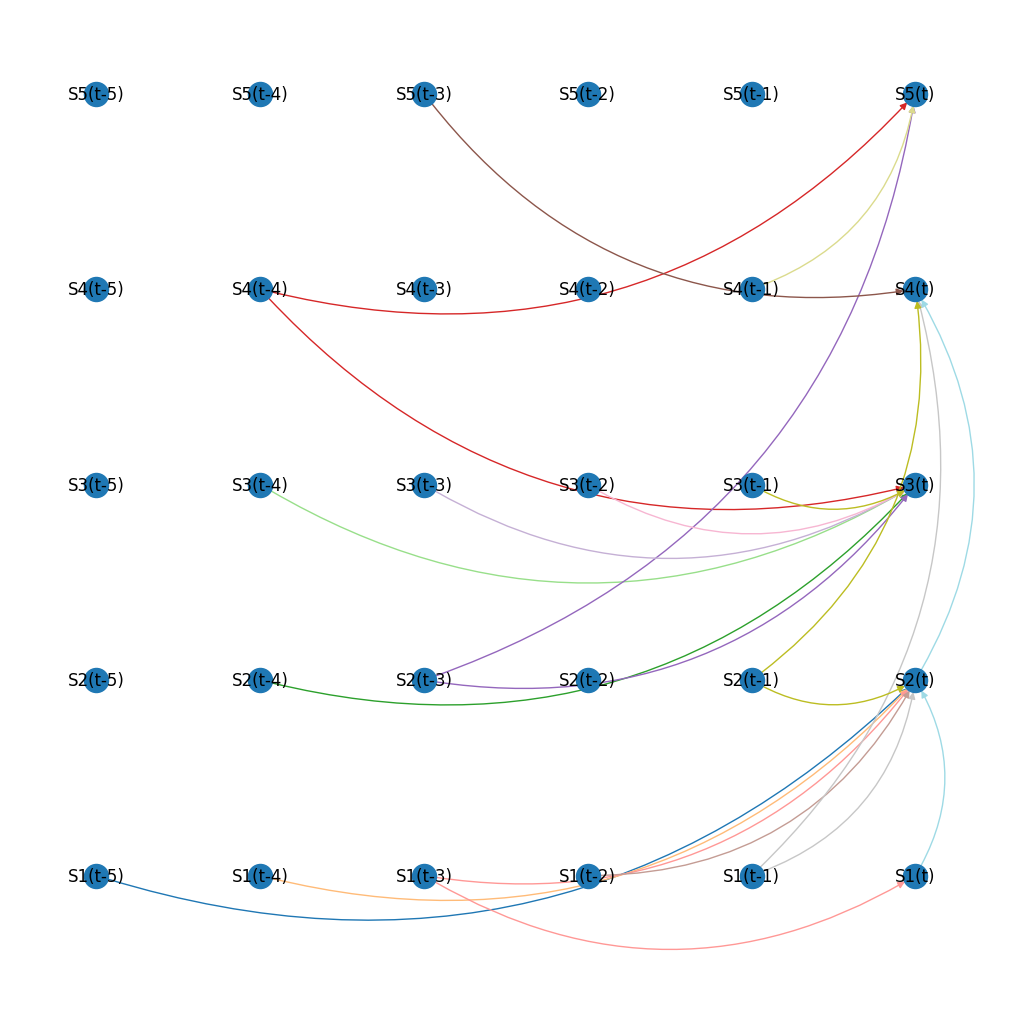

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
nx.draw(G_2d_s, pos_2d_s, cmap = plt.get_cmap('jet'), edge_cmap= plt.cm.tab20, edge_color=weights_2d_s, with_labels = True, connectionstyle='arc3, rad = 0.3')
#nx.draw_networkx(G, with_labels = True)
plt.show()

In [ ]:
cdt.metrics.SHD(true_full_graph, pred_graph_notears)

21.0

In [ ]:
true_values = true_full_graph
predictions = pred_graph_notears

N = true_values.shape[1]*true_values.shape[0]
accuracy = (true_values == predictions).sum() / N
TP = ((predictions == 1) & (true_values == 1)).sum()
FP = ((predictions == 1) & (true_values == 0)).sum()
TN = ((predictions == 0) & (true_values == 0)).sum()
FN = ((predictions == 0) & (true_values == 1)).sum()
precision = TP / (TP+FP)
recall = TP / (TP + FN)
FDR = FP / (FP + TP)
F1 = 2 * (precision * recall) / (precision + recall)
print('Accuracy: {}, Precision: {}, Recall: {}, FDR: {}, F1 Score: {}'.format(accuracy, precision, recall, FDR,F1))

Accuracy: 0.86, Precision: 0.22727272727272727, Recall: 0.5555555555555556, FDR: 0.7727272727272727, F1 Score: 0.3225806451612903


# DYNOTEARS Method


The DYNOTEARS method is already available inside the "CausalNex" library. So have installed that library to use this method on our synthetic dataset.




In [ ]:
%cd /content

/content


In [ ]:
%pwd

'/content'

In [ ]:
!pip install causalnex

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.5/819.5 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.0 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.8 MB/s eta 0:00:00
  Attempt

In [ ]:
from causalnex.structure.dynotears import from_pandas_dynamic

sm = from_pandas_dynamic(syn_data_4_df, p=5, w_threshold=0.05, lambda_w=0.01, lambda_a=0.01)

RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.


In [ ]:
sm.to_directed()

In [ ]:
sm.pred

AdjacencyView({'S1_lag0': {'S1_lag1': {'origin': 'learned', 'weight': 0.21628568726089348}, 'S1_lag2': {'origin': 'learned', 'weight': 0.20535696394235545}, 'S1_lag3': {'origin': 'learned', 'weight': 0.19442824048235233}, 'S1_lag4': {'origin': 'learned', 'weight': 0.1834995169169121}, 'S1_lag5': {'origin': 'learned', 'weight': 0.17257079458257735}}, 'S1_lag1': {}, 'S1_lag2': {}, 'S1_lag3': {}, 'S1_lag4': {}, 'S1_lag5': {}, 'S2_lag0': {'S2_lag2': {'origin': 'learned', 'weight': 0.42492027928009524}, 'S2_lag3': {'origin': 'learned', 'weight': 0.0998164729095931}, 'S2_lag4': {'origin': 'learned', 'weight': 0.302196527980881}, 'S2_lag5': {'origin': 'learned', 'weight': 0.12027466822738257}}, 'S2_lag1': {}, 'S2_lag2': {}, 'S2_lag3': {}, 'S2_lag4': {}, 'S2_lag5': {}, 'S3_lag0': {'S3_lag2': {'origin': 'learned', 'weight': 0.06412706431555167}, 'S2_lag3': {'origin': 'learned', 'weight': 0.18805845590744433}, 'S4_lag4': {'origin': 'learned', 'weight': 0.15309898743118983}, 'S2_lag5': {'origin':

In [ ]:
sm.nodes

NodeView(('S1_lag0', 'S1_lag1', 'S1_lag2', 'S1_lag3', 'S1_lag4', 'S1_lag5', 'S2_lag0', 'S2_lag1', 'S2_lag2', 'S2_lag3', 'S2_lag4', 'S2_lag5', 'S3_lag0', 'S3_lag1', 'S3_lag2', 'S3_lag3', 'S3_lag4', 'S3_lag5', 'S4_lag0', 'S4_lag1', 'S4_lag2', 'S4_lag3', 'S4_lag4', 'S4_lag5', 'S5_lag0', 'S5_lag1', 'S5_lag2', 'S5_lag3', 'S5_lag4', 'S5_lag5'))

In [ ]:
sm.edges

OutEdgeView([('S1_lag1', 'S1_lag0'), ('S1_lag2', 'S1_lag0'), ('S1_lag3', 'S1_lag0'), ('S1_lag4', 'S1_lag0'), ('S1_lag5', 'S1_lag0'), ('S2_lag0', 'S5_lag0'), ('S2_lag1', 'S4_lag0'), ('S2_lag2', 'S2_lag0'), ('S2_lag3', 'S2_lag0'), ('S2_lag3', 'S3_lag0'), ('S2_lag4', 'S2_lag0'), ('S2_lag5', 'S2_lag0'), ('S2_lag5', 'S3_lag0'), ('S2_lag5', 'S5_lag0'), ('S3_lag2', 'S3_lag0'), ('S4_lag1', 'S4_lag0'), ('S4_lag2', 'S4_lag0'), ('S4_lag4', 'S3_lag0'), ('S4_lag4', 'S4_lag0'), ('S5_lag1', 'S5_lag0'), ('S5_lag2', 'S5_lag0'), ('S5_lag4', 'S5_lag0')])

##Full Causal Graph


DYNOTEARS method generates the causal graph in a different format. So we have transformed their graph format into an array-like adjacency matrix.

In [ ]:
nodes_2d_dy = ['S1_lag5', 'S2_lag5', 'S3_lag5',  'S4_lag5','S5_lag5',
         'S1_lag4', 'S2_lag4', 'S3_lag4',  'S4_lag4', 'S5_lag4',
         'S1_lag3', 'S2_lag3', 'S3_lag3',  'S4_lag3', 'S5_lag3',
         'S1_lag2', 'S2_lag2', 'S3_lag2',  'S4_lag2', 'S5_lag2',
         'S1_lag1', 'S2_lag1', 'S3_lag1',  'S4_lag1', 'S5_lag1',
         'S1_lag0', 'S2_lag0', 'S3_lag0',  'S4_lag0', 'S5_lag0']
nodes_r_2d_dy=['S1_lag0', 'S2_lag0', 'S3_lag0',  'S4_lag0', 'S5_lag0']
pred_graph_full = np.zeros((5,30))

In [ ]:
for ce in sm.edges:
  c = ce[0]
  e = ce[1]
  row = np.where(np.char.equal(nodes_r_2d_dy, e))[0]
  col = np.where(np.char.equal(nodes_2d_dy, c))[0]
  pred_graph_full[row, col]=1

In [ ]:
pred_graph_full

array([[1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.]])

In [ ]:
np.savetxt('/content/dynotears-full-adj-mat-syn-V1.csv', pred_graph_full, delimiter=",")

In [ ]:
import networkx as nx
G_2d_s = nx.DiGraph()

nodes_2d_s = ["S1(t-5)", "S2(t-5)", "S3(t-5)",  "S4(t-5)", "S5(t-5)",
         "S1(t-4)", "S2(t-4)", "S3(t-4)",  "S4(t-4)",  "S5(t-4)",
         "S1(t-3)", "S2(t-3)", "S3(t-3)",  "S4(t-3)", "S5(t-3)",
         "S1(t-2)", "S2(t-2)", "S3(t-2)",  "S4(t-2)", "S5(t-2)",
         "S1(t-1)", "S2(t-1)", "S3(t-1)",  "S4(t-1)", "S5(t-1)",
         "S1(t)", "S2(t)", "S3(t)",  "S4(t)",  "S5(t)"]
nodes_r_2d_s=["S1(t)", "S2(t)", "S3(t)",  "S4(t)",  "S5(t)"]
matrix_2d_2d_s = pred_graph_full

In [ ]:
for i in range (0, 30):
  G_2d_s.add_node(nodes_2d_s[i],pos=(int(i/5)+1,(i%5)+1))

In [ ]:
for i in range(0, 30):
  for j in range (0, 5):
    if matrix_2d_2d_s[j,i] > 0.3:
      #print(i,j)
      G_2d_s.add_edge(nodes_2d_s[i], nodes_r_2d_s[j], weight=i)

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


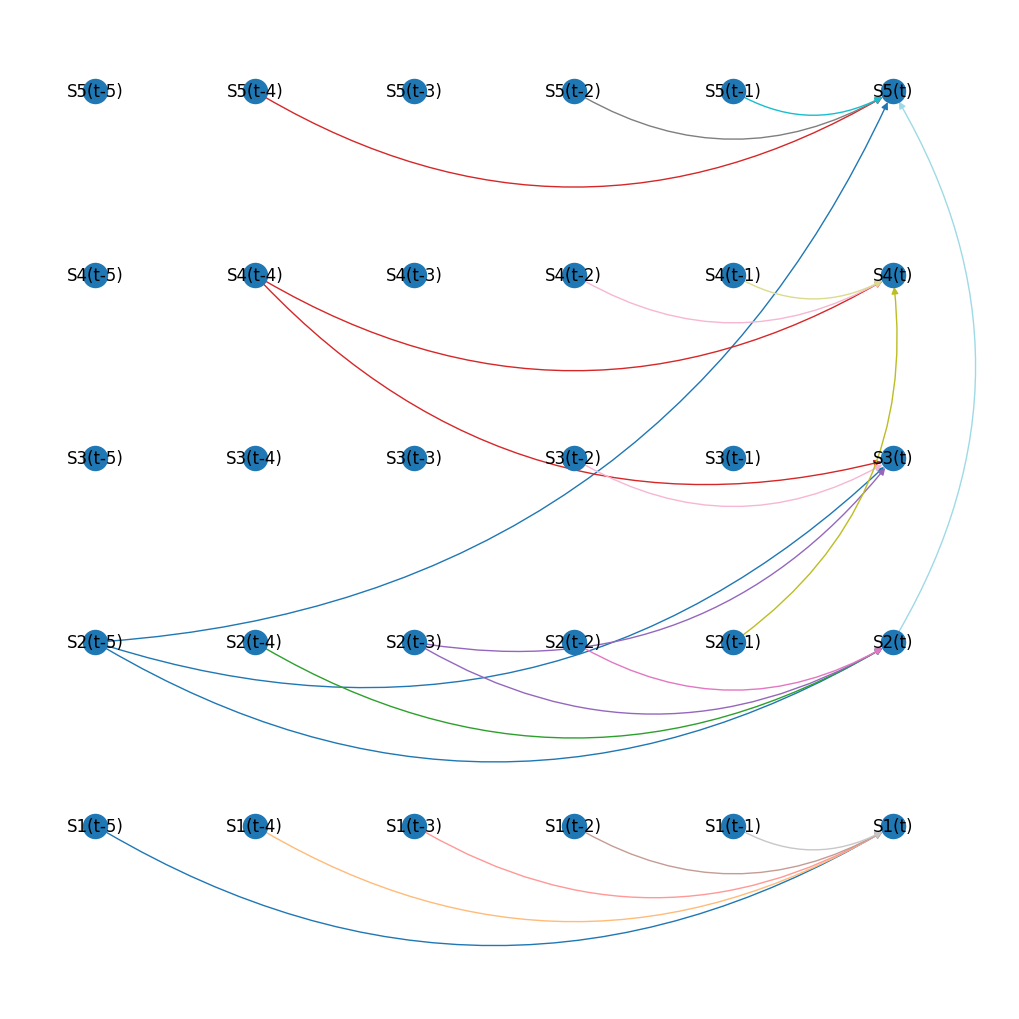

In [ ]:
pos_2d_s=nx.get_node_attributes(G_2d_s,'pos')
weights_2d_s = nx.get_edge_attributes(G_2d_s,'weight').values()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
nx.draw(G_2d_s, pos_2d_s, cmap = plt.get_cmap('jet'), edge_cmap= plt.cm.tab20, edge_color=weights_2d_s, with_labels = True, connectionstyle='arc3, rad = 0.3')
#nx.draw_networkx(G, with_labels = True)
plt.show()

In [ ]:
cdt.metrics.SHD(true_full_graph, pred_graph_full)

27.0

In [ ]:
true_values = true_full_graph
predictions = pred_graph_full

N = true_values.shape[1]*true_values.shape[0]
accuracy = (true_values == predictions).sum() / N
TP = ((predictions == 1) & (true_values == 1)).sum()
FP = ((predictions == 1) & (true_values == 0)).sum()
TN = ((predictions == 0) & (true_values == 0)).sum()
FN = ((predictions == 0) & (true_values == 1)).sum()
precision = TP / (TP+FP)
recall = TP / (TP + FN)
FDR = FP / (FP + TP)
F1 = 2 * (precision * recall) / (precision + recall)
print('Accuracy: {}, Precision: {}, Recall: {}, FDR: {}, F1 Score: {}'.format(accuracy, precision, recall, FDR,F1))

Accuracy: 0.82, Precision: 0.09090909090909091, Recall: 0.2222222222222222, FDR: 0.9090909090909091, F1 Score: 0.1290322580645161


#NTS-NOTEARS Model


To execute the NTS-NOTEARS method we have to install a new version of the Numpy package. The Numpy version by default available in Google Collab does not work with the NTS-NOTEARS method.

In [ ]:
import numpy
numpy.version.version

'1.25.2'

In [ ]:
!pip uninstall numpy --y

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4


In [ ]:
!pip install numpy==1.24.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 42.1 MB/s eta 0:00:00


In [ ]:
%cd /content

/content


In [ ]:
!pip install lingam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.8 MB/s eta 0:00:00
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.7/100.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 15.7 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 5.0 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=ab864d1afec7a7c8bfa9789168b2ef9786b636a585eb30681f9969b3e33cb5e8
  Stored in directory: /root/.cache/pip/wheels/5

In [ ]:
! git clone https://github.com/xiangyu-sun-789/NTS-NOTEARS

Cloning into 'NTS-NOTEARS'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 39 (delta 17), reused 32 (delta 13), pack-reused 0 (from 0)
Receiving objects: 100% (39/39), 26.69 KiB | 1.91 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [ ]:
%cd /content/NTS-NOTEARS/notears

/content/NTS-NOTEARS/notears


The code provided by the authors of the NTS-NOTEARS method in the GitHub repository works only with their synthetic data generation function built into the code. But we want to apply our data to this method. That's why we have copied the code from the official GitHub repository and modified the main function to apply our synthetic datasets.

In [ ]:
from locally_connected import LocallyConnected
from lbfgsb_scipy import LBFGSBScipy
from trace_expm import trace_expm
from utils import *

In [ ]:
import csv
import math
import os
import warnings
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
from sklearn import preprocessing
from locally_connected import LocallyConnected
from lbfgsb_scipy import LBFGSBScipy
from trace_expm import trace_expm
from utils import *


class NTS_NOTEARS(nn.Module):
    def __init__(self, dims, bias=True, number_of_lags=None, prior_knowledge=None, variable_names_no_time=None):
        super(NTS_NOTEARS, self).__init__()
        assert len(dims) >= 2
        assert dims[-1] == 1

        # the time steps (..., t-2, t-1, t) are ordered from left to right
        self.simultaneous_idx = self.number_of_lags = number_of_lags

        # k: lagged time steps + instantaneous step
        self.kernal_size = number_of_lags + 1

        self.prior_knowledge = prior_knowledge
        self.variable_names_no_time = variable_names_no_time

        d = dims[0]
        self.dims = dims

        # fc1: variable splitting for l1

        self.conv1d_pos = nn.Conv1d(in_channels=d, out_channels=d * dims[1], bias=bias, kernel_size=self.kernal_size,
                                    stride=1, padding=0)

        self.conv1d_neg = nn.Conv1d(in_channels=d, out_channels=d * dims[1], bias=bias, kernel_size=self.kernal_size,
                                    stride=1, padding=0)

        # L-BFGS-B algorithm for bound constrained minimization.
        # https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#id11
        # https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_l_bfgs_b.html#scipy.optimize.fmin_l_bfgs_b

        # in order to add prior knowledge rather than 0, we need asymmetric bounds on pos_weights and neg_weights.
        # It can be either (pos_weights>0 and neg_weights=0) or (pos_weights=0 and neg_weights>0)
        self.conv1d_pos.instantaneous_bounds = self._instantaneous_bounds_pos()
        self.conv1d_neg.instantaneous_bounds = self._instantaneous_bounds_neg()

        self.conv1d_pos.lag_bounds_lists = self._lag_bounds_pos()
        self.conv1d_neg.lag_bounds_lists = self._lag_bounds_neg()

        # fc2: local linear layers
        layers = []
        for l in range(len(dims) - 2):
            layers.append(LocallyConnected(d, dims[l + 1], dims[l + 2], bias=bias))
        self.fc2 = nn.ModuleList(layers)

    def _instantaneous_bounds_pos(self):
        d = self.dims[0]
        bounds = []
        for j in range(d):  # child nodes
            for m in range(self.dims[1]):
                for i in range(d):  # parent nodes
                    if i == j:  # no self loop
                        bound = (0, 0)

                    else:
                        bound = (0, None)

                    # overwrite the bound if prior knowledge is provided
                    if self.prior_knowledge is not None:
                        for pk in self.prior_knowledge:
                            if pk["from_lag"] == 0:
                                if (self.variable_names_no_time[i] == pk["from_node"] or pk["from_node"] == "*") and \
                                        (self.variable_names_no_time[j] == pk["to_node"] or pk["to_node"] == "*"):
                                    lower_bound_converted = convert_provided_bound(pk["lower_bound"], self.dims[1])
                                    upper_bound_converted = \
                                        convert_provided_bound(pk["upper_bound"], self.dims[1]) \
                                            if pk["upper_bound"] is not None \
                                            else None
                                    bound = (lower_bound_converted, upper_bound_converted)

                    bounds.append(bound)
        return bounds

    def _instantaneous_bounds_neg(self):
        d = self.dims[0]
        bounds = []
        for j in range(d):  # child nodes
            for m in range(self.dims[1]):
                for i in range(d):  # parent nodes
                    if i == j:  # no self loop
                        bound = (0, 0)

                    else:
                        bound = (0, None)

                    # overwrite the neg bound as (0, 0) if prior knowledge is provided
                    if self.prior_knowledge is not None:
                        for pk in self.prior_knowledge:
                            if pk["from_lag"] == 0:
                                if (self.variable_names_no_time[i] == pk["from_node"] or pk["from_node"] == "*") and \
                                        (self.variable_names_no_time[j] == pk["to_node"] or pk["to_node"] == "*"):
                                    bound = (0, 0)

                    bounds.append(bound)
        return bounds

    def _lag_bounds_pos(self):
        d = self.dims[0]
        bounds = []
        for j in range(d):  # child nodes
            for m in range(self.dims[1]):
                for i in range(d):  # parent nodes
                    bound = []
                    for lag in range(self.number_of_lags, 0, -1):  # lags
                        current_bound = [(0, None)]

                        # overwrite the bound if prior knowledge is provided
                        if self.prior_knowledge is not None:
                            for pk in self.prior_knowledge:
                                if pk["from_lag"] == lag:
                                    if (self.variable_names_no_time[i] == pk["from_node"] or pk["from_node"] == "*") and \
                                            (self.variable_names_no_time[j] == pk["to_node"] or pk["to_node"] == "*"):
                                        lower_bound_converted = convert_provided_bound(pk["lower_bound"], self.dims[1])
                                        upper_bound_converted = \
                                            convert_provided_bound(pk["upper_bound"], self.dims[1]) \
                                                if pk["upper_bound"] is not None \
                                                else None
                                        current_bound = [(lower_bound_converted, upper_bound_converted)]

                        bound += current_bound

                    bounds.append(bound)
        return bounds

    def _lag_bounds_neg(self):
        d = self.dims[0]
        bounds = []
        for j in range(d):  # child nodes
            for m in range(self.dims[1]):
                for i in range(d):  # parent nodes
                    bound = []
                    for lag in range(self.number_of_lags, 0, -1):  # lags
                        current_bound = [(0, None)]

                        # overwrite the neg bound as (0, 0) if prior knowledge is provided
                        if self.prior_knowledge is not None:
                            for pk in self.prior_knowledge:
                                if pk["from_lag"] == lag:
                                    if (self.variable_names_no_time[i] == pk["from_node"] or pk["from_node"] == "*") and \
                                            (self.variable_names_no_time[j] == pk["to_node"] or pk["to_node"] == "*"):
                                        current_bound = [(0, 0)]

                        bound += current_bound

                    bounds.append(bound)
        return bounds

    def forward(self, x_series, device):
        """
        d: the number of variables per time step.

        n: the number of time steps in the data.

        k: the number of time steps in the model (lag + instantaneous)

        :param x_series: shape [1, d, n]
        :param device:
        :return: shape [n, d]
        """

        x_not_shaped = self.conv1d_pos.to(device)(x_series) - self.conv1d_neg.to(device)(x_series)  # [1, d * m1, n]

        x = x_not_shaped.T  # [n, d * m1, 1]
        x = x.squeeze(dim=2)  # [n, d * m1]

        x = x.view(-1, self.dims[0], self.dims[1])  # [n, d, m1]

        assert x.size()[1] == self.dims[0] and x.size()[2] == self.dims[1]

        # assert torch.all(torch.eq(x_not_shaped[0, 0:self.dims[1], 0], x[0, 0, :]))
        # assert torch.all(torch.eq(x_not_shaped[0, self.dims[1]:self.dims[1] + self.dims[1], 0], x[0, 1, :]))
        # assert torch.all(torch.eq(x_not_shaped[0, 0:self.dims[1], 1], x[1, 0, :]))
        # assert torch.all(torch.eq(x_not_shaped[0, self.dims[1]:self.dims[1] + self.dims[1], 1], x[1, 1, :]))

        for fc in self.fc2.to(device):
            x = torch.sigmoid(x)  # [n, d, m1]
            x = fc(x)  # [n, d, m2]
        x = x.squeeze(dim=2)  # [n, d]
        return x

    def h_func(self):
        """Constrain 2-norm-squared of fc1 weights along m1 dim to be a DAG"""

        """
        compute the h(W) surrogate function. This is only needed for the instantaneous weights, not for the lagged weights.
        """

        d = self.dims[0]

        # [:,:,0:k-1] are lagged, [:,:,k-1] are instantaneous
        fc_simultaneous_weight = self.conv1d_pos.weight[:, :, self.simultaneous_idx] - self.conv1d_neg.weight[:, :,
                                                                                       self.simultaneous_idx]  # [j * m1, i]
        fc_simultaneous_weight = fc_simultaneous_weight.view(d, -1, d)  # [j, m1, i]
        A = torch.sum(fc_simultaneous_weight * fc_simultaneous_weight, dim=1).t()  # [i, j]

        A = A.cpu()  # required inside `trace_expm()`

        h = trace_expm(A) - d  # (Zheng et al. 2018)
        # A different formulation, slightly faster at the cost of numerical stability
        # M = torch.eye(d) + A / d  # (Yu et al. 2019)
        # E = torch.matrix_power(M, d - 1)
        # h = (E.t() * M).sum() - d
        return h

    def l2_reg(self):
        """Take 2-norm-squared of all parameters"""
        reg = 0.

        fc1_weight = self.conv1d_pos.weight - self.conv1d_neg.weight  # [j * m1, i]
        reg += torch.sum(fc1_weight ** 2)

        for fc in self.fc2:
            reg += torch.sum(fc.weight ** 2)
        return reg

    def fc1_l1_reg(self, kernel_index=None):
        """
        Take l1 norm of input weights, both lagged and instantaneous
        """
        if kernel_index is None:
            reg = torch.sum(self.conv1d_pos.weight + self.conv1d_neg.weight)
        else:
            reg = torch.sum(self.conv1d_pos.weight[:, :, kernel_index] + self.conv1d_neg.weight[:, :, kernel_index])

        return reg

    @torch.no_grad()
    def fc1_to_adj(self):
        """Get W from fc1 weights, take 2-norm over m1 dim"""
        d = self.dims[0]

        # [:,:,0:k-1] are lagged, [:,:,k-1] are instantaneous
        fc_simultaneous_weight = self.conv1d_pos.weight[:, :, self.simultaneous_idx] - self.conv1d_neg.weight[:, :,
                                                                                       self.simultaneous_idx]  # [j * m1, i]
        fc_simultaneous_weight = fc_simultaneous_weight.view(d, -1, d)  # [j, m1, i]
        A_simultaneous = torch.sum(fc_simultaneous_weight * fc_simultaneous_weight, dim=1).t()  # [i, j]
        W_simultaneous = torch.sqrt(A_simultaneous)  # [i, j]
        W_simultaneous = W_simultaneous.cpu().detach().numpy()  # [i, j]

        W_NAR = np.empty((0, self.dims[0]))  # [0, j], will be [(k-1) * i, j]
        for lag_idx in range(self.number_of_lags):
            fc_NAR_weight = self.conv1d_pos.weight[:, :, lag_idx] - self.conv1d_neg.weight[:, :, lag_idx]  # [j * m1, i]
            fc_NAR_weight = fc_NAR_weight.view(d, -1, d)  # [j, m1, i]
            A_NAR = torch.sum(fc_NAR_weight * fc_NAR_weight, dim=1).t()  # [i, j]
            W_current_lag = torch.sqrt(A_NAR)  # [i, j]
            W_current_lag = W_current_lag.cpu().detach().numpy()  # [i, j]

            W_NAR = np.vstack((W_NAR, W_current_lag))

            # make sure earlier lags are stacked above later lags
            # assert np.all(W_NAR[-1 * self.dims[0]:, :] == W_current_lag)

        assert W_NAR.shape == (self.dims[0] * self.number_of_lags, self.dims[0])

        return W_simultaneous, W_NAR


def convert_provided_bound(bound_provided_by_user, number_of_hidden_neurons_connected):
    """
    for either the lower bound or the upper bound provided by the user, it is not the final estimated edge strength
    `s`, because the final estimated edge strength $$ s = L2-norm(all relevant edges) = sqrt(m * b^2) $$, where `s` is the
    estimated edge strength shown on the graph, `b` is the provided bound by the user, and `m` is the number of hidden
    neurons connected. In order to make the estimated edge strength `s` equal to the provided bound `b`, we need to
    scale the provided bound `b` behind the scenes.

    s = b = sqrt(m * x^2), where x is the scaled version of `b` provided by the user.

    Therefore, x = sqrt(b^2/m), which we apply to the L-BFGS-B algorithm as the bound.

    """
    return math.sqrt(bound_provided_by_user ** 2 / number_of_hidden_neurons_connected)


def squared_loss(output, target):
    n = target.shape[0]
    loss = 0.5 / n * torch.sum((output - target) ** 2)
    return loss


def reshape_for_model_forward(X, model):
    X_reshaped = X.T.reshape(1, model.dims[0], -1)
    return X_reshaped


def dual_ascent_step(model: NTS_NOTEARS, normalized_X, device, lambda1, lambda2, rho, alpha, h, rho_max):
    """Perform one step of dual ascent in augmented Lagrangian."""
    h_new = None
    optimizer = LBFGSBScipy(model.parameters())
    optimizer.assign_bounds(model)

    while rho < rho_max:
        def closure():
            optimizer.zero_grad()

            assert X_torch.shape[0] == 1
            assert X_torch.shape[1] == model.dims[0]

            X_hat = model(X_torch, device)

            # assert torch.all(
            #     torch.eq(X_torch[0, :, model.simultaneous_idx],
            #              torch.squeeze(X_torch.T)[model.simultaneous_idx:][0, :]))
            # assert torch.all(torch.eq(X_torch[0, :, model.simultaneous_idx + 1],
            #                           torch.squeeze(X_torch.T)[model.simultaneous_idx:][1, :]))
            # assert X_hat.size() == torch.squeeze(X_torch.T)[model.simultaneous_idx:].size()

            loss = squared_loss(X_hat,
                                torch.squeeze(X_torch.T)[
                                model.simultaneous_idx:])  # compare the instantaneous time step

            h_val = model.h_func()
            penalty = 0.5 * rho * h_val * h_val + alpha * h_val
            l2_reg = 0.5 * lambda2 * model.l2_reg()

            # apply each lambda1 to its corresponding kernel step
            if type(lambda1) == list:
                if len(lambda1) != model.kernal_size:
                    raise Exception(
                        "Lambda1s need to be defined for all steps. In the order of ..., lag2, lag1, instantaneous.")

                l1_reg = 0
                for kernel_index in range(model.kernal_size):
                    current_lambda1 = lambda1[kernel_index]
                    l1_reg += current_lambda1 * model.fc1_l1_reg(kernel_index)

            # apply the lambda1 to all kernel steps
            else:
                l1_reg = lambda1 * model.fc1_l1_reg()

            primal_obj = loss + penalty + l2_reg + l1_reg
            primal_obj.backward()
            return primal_obj

        normalized_X_reshaped = reshape_for_model_forward(normalized_X, model)

        # assert np.all(normalized_X[0, :] == normalized_X_reshaped[0, :, 0])
        # assert np.all(normalized_X[1, :] == normalized_X_reshaped[0, :, 1])

        X_torch = torch.from_numpy(normalized_X_reshaped).to(device)

        optimizer.step(closure)  # NOTE: updates model in-place

        # make sure bounds are working correctly
        # model.conv1d_pos.weight shape: (d * m1, d, k)
        # assert torch.all(model.conv1d_pos.weight[0:model.dims[1], 0, model.simultaneous_idx] == 0)
        # assert torch.all(model.conv1d_pos.weight[model.dims[1]:model.dims[1] * 2, 1, model.simultaneous_idx] == 0)
        # assert torch.all(model.conv1d_neg.weight[0:model.dims[1], 0, model.simultaneous_idx] == 0)
        # assert torch.all(model.conv1d_neg.weight[model.dims[1]:model.dims[1] * 2, 1, model.simultaneous_idx] == 0)

        with torch.no_grad():
            h_new = model.h_func().item()
        if h_new > 0.25 * h:
            rho *= 10
        else:
            break
    alpha += rho * h_new
    return rho, alpha, h_new


def train_NTS_NOTEARS(model: NTS_NOTEARS,
                      normalized_X,
                      device,
                      # float: The lambda applies to all convolutional parameters in all time steps.
                      # list: A list of lambdas for convolutional parameters in each time step. In the order of ..., lag2, lag1, instantaneous. E.g. [0.02, 0.01]
                      lambda1: float or list,
                      lambda2: float,  # The lambda for all parameters.
                      # float: The w_threshold applies to all convolutional parameters in all time steps.
                      # list: A list of w_thresholds for convolutional parameters in each time step. In the order of ..., lag2, lag1, instantaneous. E.g. [0.3, 0.3]
                      w_threshold: float or list,
                      max_iter: int = 100,
                      # in order to avoid cycles in the estimated graph, decrease the value here.
                      h_tol: float = 1e-8,
                      rho_max: float = 1e+16,
                      verbose=0):
    rho, alpha, h = 1.0, 0.0, np.inf
    for iteration in range(max_iter):
        if verbose > 0:
            print('\niteration: ', iteration)

        rho, alpha, h = dual_ascent_step(model, normalized_X, device, lambda1, lambda2, rho, alpha, h, rho_max)
        if h <= h_tol:
            print("Done, h {:e} <= h_tol {:e}".format(h, h_tol))
            break

        if rho >= rho_max:
            warnings.warn("h {:e} > h_tol {:e} . "
                          "Consider to increase rho_max. "
                          "rho {:e} >= rho_max {:e}".format(h, h_tol, rho, rho_max))
            break

        if h > h_tol and iteration == max_iter - 1:
            warnings.warn("Failed to converge. Consider to increase max_iter.")

    # assert torch.all(model.conv1d_pos.weight[0:model.dims[1], 0, model.simultaneous_idx] == 0)
    # assert torch.all(model.conv1d_neg.weight[0:model.dims[1], 0, model.simultaneous_idx] == 0)
    # assert torch.all(model.conv1d_pos.weight[model.dims[1]:model.dims[1] * 2, 1, model.simultaneous_idx] == 0)
    # assert torch.all(model.conv1d_neg.weight[model.dims[1]:model.dims[1] * 2, 1, model.simultaneous_idx] == 0)

    W_simultaneous_est, W_NAR_est = model.fc1_to_adj()

    # eliminate edges smaller than `w_threshold`
    if type(w_threshold) == list:

        if len(w_threshold) != model.kernal_size:
            raise Exception(
                "w_thresholds need to be defined for all steps. In the order of ..., lag2, lag1, instantaneous.")

        # apply w_threshold to instantaneous step
        W_simultaneous_est[np.abs(W_simultaneous_est) < w_threshold[-1]] = 0

        # apply w_threshold to lagged steps in the order of ..., lag2, lag1.
        d = model.dims[0]
        for kernel_index in range(model.kernal_size - 1):
            W_NAR_est[d * kernel_index: d * (kernel_index + 1), :][
                np.abs(W_NAR_est[d * kernel_index: d * (kernel_index + 1), :]) < w_threshold[kernel_index]] = 0

    else:
        W_simultaneous_est[np.abs(W_simultaneous_est) < w_threshold] = 0
        W_NAR_est[np.abs(W_NAR_est) < w_threshold] = 0

    d = model.dims[0]
    k = model.kernal_size  # number of lags + 1

    W_est_full = np.zeros((d * k, d * k))  # shape: (d * k, d * k)

    # the W is defined as row variable -> column variable
    # for lagged W:
    #   row-wise: x1_{t-2}, x2_{t-2}, ..., x1_{t-1}, x2_{t-1}, ...,
    #   column-wise: x1_{t}, x2_{t}, ...
    # for instantaneous W:
    #   row-wise: x1_{t}, x2_{t}, ...
    #   column-wise: x1_{t}, x2_{t}, ...
    # therefore, stack W's vertically (lagged W first, instantaneous W last)
    W_est = np.vstack((W_NAR_est, W_simultaneous_est))  # shape: (d * k, d)

    W_est_full[:, -1 * d:] = W_est

    # `W_est_full` is defined as: row variable -> column variable
    # row variables and column variables are the same, in the order of:
    # ..., x1_{t-2}, x2_{t-2}, ..., x1_{t-1}, x2_{t-1}, ..., x1_{t}, x2_{t}, ...
    return W_est_full


In [ ]:
from utils import *
def main(lags=5, data= syn_data_4_df):
    torch.set_default_dtype(torch.double)
    np.set_printoptions(precision=3)

    sequence_length = 2000
    d = 5
    sem_type = 'AdditiveIndexModel'
    number_of_lags = lags #5
    result_folder = 'results'
    seed = 8

    if not os.path.exists(result_folder):
        os.mkdir(result_folder)

    #import utils as ut
    set_random_seed(seed)

    n, s0, graph_type = sequence_length, d, 'ER'

    variable_names_no_time = ['X{}'.format(j) for j in range(1, d + 1)]
    variable_names = make_variable_names_with_time_steps(number_of_lags, variable_names_no_time)

    normalized_X = data
    #assert (normalized_X.std(axis=0).round(decimals=3) == 1).all()  # make sure all the variances are (very close to) 1

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print('\nUsing device: {}\n'.format(device))

    w_threshold = 0.3

    prior_knowledge = None



    model = NTS_NOTEARS(dims=[d, 10, 1], bias=True, number_of_lags=number_of_lags,
                        prior_knowledge=prior_knowledge, variable_names_no_time=variable_names_no_time)

    W_est_full = train_NTS_NOTEARS(model, normalized_X, device=device, lambda1=0.0005, lambda2=0.001, #lambda1=0.005, lambda2=0.01,
                                   w_threshold=w_threshold, h_tol=1e-60, verbose=1)

    variable_names = make_variable_names_with_time_steps(number_of_lags, variable_names_no_time)
    print(variable_names)

    file_name = 'W_estimated_DAG'

    save_adjacency_matrix_in_csv(os.path.join(result_folder, file_name), W_est_full, variable_names)

    draw_DAGs_using_LINGAM(os.path.join(result_folder, file_name), W_est_full, variable_names)

    binary_estimated = W_est_full != 0

    total_d = d * (number_of_lags + 1)
    #draw_adjacency_matrix_colormap(B_true, total_d, "True Graph", result_folder)
    draw_adjacency_matrix_colormap(binary_estimated, total_d, "Estimated Graph", result_folder)

    #draw_adjacency_matrix_colormap(B_true[:d, -d:], d, "True (t-2)", result_folder)
    draw_adjacency_matrix_colormap(binary_estimated[:d, -d:], d, "Estimated (t-2)", result_folder)

    #draw_adjacency_matrix_colormap(B_true[d:2 * d, -d:], d, "True (t-1)", result_folder)
    draw_adjacency_matrix_colormap(binary_estimated[d:2 * d, -d:], d, "Estimated (t-1)", result_folder)

    #draw_adjacency_matrix_colormap(B_true[2 * d:, -d:], d, "True (t)", result_folder)
    draw_adjacency_matrix_colormap(binary_estimated[2 * d:, -d:], d, "Estimated (t)", result_folder)

    #draw_adjacency_matrix_colormap_with_variables(B_true, number_of_lags, d, "True Graph", result_folder,
                                                 # variable_names)
    draw_adjacency_matrix_colormap_with_variables(binary_estimated, number_of_lags, d, "Estimated Graph", result_folder,
                                                  variable_names)

    assert is_dag(W_est_full), 'The estimated graph has cycles.'

    #acc = ut.count_accuracy(B_true, W_est_full != 0)
    #print(acc)
    #write_log_file(os.path.join(result_folder, "SHD.txt"), str(acc))

With time lag 1 this model throws some error.

In [ ]:
syn_data_4_df.columns

Index(['S1', 'S2', 'S3', 'S4', 'S5'], dtype='object')

In [ ]:
main(lags=5, data= syn_data_4_df.to_numpy())


Using device: cpu


iteration:  0

iteration:  1

iteration:  2

iteration:  3

iteration:  4

iteration:  5

iteration:  6

iteration:  7

iteration:  8

iteration:  9

iteration:  10

iteration:  11

iteration:  12

iteration:  13
Done, h 0.000000e+00 <= h_tol 1.000000e-60
['X1(t-5)', 'X2(t-5)', 'X3(t-5)', 'X4(t-5)', 'X5(t-5)', 'X1(t-4)', 'X2(t-4)', 'X3(t-4)', 'X4(t-4)', 'X5(t-4)', 'X1(t-3)', 'X2(t-3)', 'X3(t-3)', 'X4(t-3)', 'X5(t-3)', 'X1(t-2)', 'X2(t-2)', 'X3(t-2)', 'X4(t-2)', 'X5(t-2)', 'X1(t-1)', 'X2(t-1)', 'X3(t-1)', 'X4(t-1)', 'X5(t-1)', 'X1(t)', 'X2(t)', 'X3(t)', 'X4(t)', 'X5(t)']


/content/NTS-NOTEARS/notears/utils.py:213: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(variable_names[-d:], rotation=-90)
/content/NTS-NOTEARS/notears/utils.py:214: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(variable_names)


##Full Cusal Graph


The NTS-NOTEARS method stores the predicted causal graph inside the result directory of the installed packeage with the file name "W_estimated_DAG.csv". This method also generate the colormap of the predicted causal graph.

In [ ]:
mat_nts_notears = pd.read_csv('/content/NTS-NOTEARS/notears/results/W_estimated_DAG.csv')

In [ ]:
mat_nts_notears

/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,row->column,X1(t-5),X2(t-5),X3(t-5),X4(t-5),X5(t-5),X1(t-4),X2(t-4),X3(t-4),X4(t-4),...,X1(t-1),X2(t-1),X3(t-1),X4(t-1),X5(t-1),X1(t),X2(t),X3(t),X4(t),X5(t)
0,X1(t-5),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.485538,0.000000,0.0,0.000000,0.000000
1,X2(t-5),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,X3(t-5),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,X4(t-5),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,X5(t-5),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
5,X1(t-4),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.485534,0.000000,0.0,0.000000,0.000000
6,X2(t-4),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.310957,0.0,0.000000,0.000000
7,X3(t-4),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
8,X4(t-4),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.388961,0.000000
9,X5(t-4),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.512015


In [ ]:
matrix_2d_2d_nts_notears = mat_nts_notears.to_numpy()[:,26:]

In [ ]:
np.savetxt('/content/nts-notears-full-adj-mat-D2.csv', matrix_2d_2d_nts_notears, delimiter=",")

In [ ]:
import networkx as nx
G_2d_s = nx.DiGraph()

nodes_2d_s = ["S1(t-5)", "S2(t-5)", "S3(t-5)",  "S4(t-5)", "S5(t-5)",
         "S1(t-4)", "S2(t-4)", "S3(t-4)",  "S4(t-4)",  "S5(t-4)",
         "S1(t-3)", "S2(t-3)", "S3(t-3)",  "S4(t-3)", "S5(t-3)",
         "S1(t-2)", "S2(t-2)", "S3(t-2)",  "S4(t-2)", "S5(t-2)",
         "S1(t-1)", "S2(t-1)", "S3(t-1)",  "S4(t-1)", "S5(t-1)",
         "S1(t)", "S2(t)", "S3(t)",  "S4(t)",  "S5(t)"]
nodes_r_2d_s=["S1(t)", "S2(t)", "S3(t)",  "S4(t)",  "S5(t)"]
pred_graph_f = np.zeros((5,30))

In [ ]:
for i in range (0, 30):
  G_2d_s.add_node(nodes_2d_s[i],pos=(int(i/5)+1,(i%5)+1))

In [ ]:
for i in range(0, 30):
  for j in range (0, 5):
    if matrix_2d_2d_nts_notears[i,j] > 0.3:
      print(i,j)
      G_2d_s.add_edge(nodes_2d_s[i], nodes_r_2d_s[j], weight=i)
      pred_graph_f[j,i]=1


0 0
5 0
6 1
8 3
9 4
10 0
15 0
16 1
17 3
18 3
19 4
20 0
23 3


In [ ]:
pos_2d_s=nx.get_node_attributes(G_2d_s,'pos')
pos_2d_s

{'S1(t-5)': (1, 1),
 'S2(t-5)': (1, 2),
 'S3(t-5)': (1, 3),
 'S4(t-5)': (1, 4),
 'S5(t-5)': (1, 5),
 'S1(t-4)': (2, 1),
 'S2(t-4)': (2, 2),
 'S3(t-4)': (2, 3),
 'S4(t-4)': (2, 4),
 'S5(t-4)': (2, 5),
 'S1(t-3)': (3, 1),
 'S2(t-3)': (3, 2),
 'S3(t-3)': (3, 3),
 'S4(t-3)': (3, 4),
 'S5(t-3)': (3, 5),
 'S1(t-2)': (4, 1),
 'S2(t-2)': (4, 2),
 'S3(t-2)': (4, 3),
 'S4(t-2)': (4, 4),
 'S5(t-2)': (4, 5),
 'S1(t-1)': (5, 1),
 'S2(t-1)': (5, 2),
 'S3(t-1)': (5, 3),
 'S4(t-1)': (5, 4),
 'S5(t-1)': (5, 5),
 'S1(t)': (6, 1),
 'S2(t)': (6, 2),
 'S3(t)': (6, 3),
 'S4(t)': (6, 4),
 'S5(t)': (6, 5)}

In [ ]:
weights_2d_s = nx.get_edge_attributes(G_2d_s,'weight').values()

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


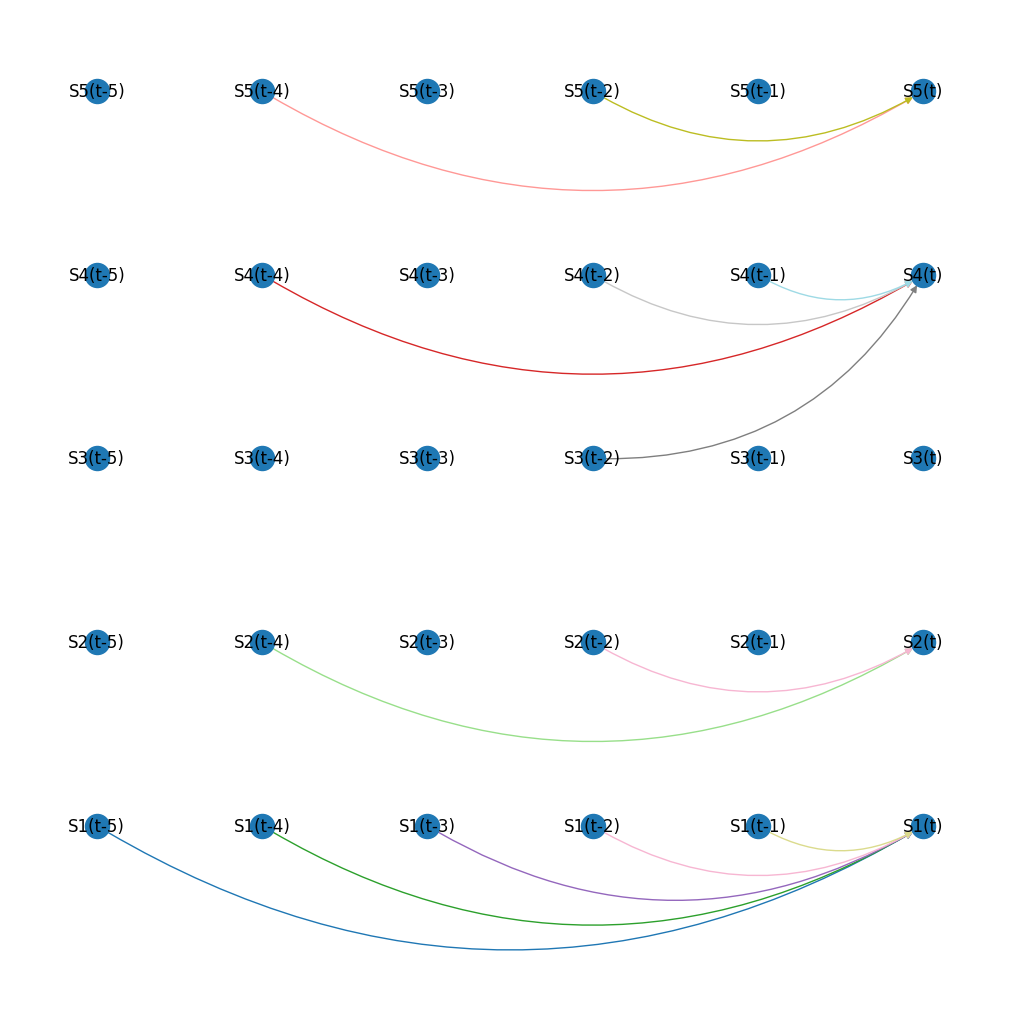

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
nx.draw(G_2d_s, pos_2d_s, cmap = plt.get_cmap('jet'), edge_cmap= plt.cm.tab20, edge_color=weights_2d_s, with_labels = True, connectionstyle='arc3, rad = 0.3')
#nx.draw_networkx(G, with_labels = True)
plt.show()

In [ ]:
pred_graph_f

In [ ]:
cdt.metrics.SHD(true_full_graph, pred_graph_f)

18.0

In [ ]:
true_values = true_full_graph
predictions = pred_graph_f

N = true_values.shape[1]*true_values.shape[0]
accuracy = (true_values == predictions).sum() / N
TP = ((predictions == 1) & (true_values == 1)).sum()
FP = ((predictions == 1) & (true_values == 0)).sum()
TN = ((predictions == 0) & (true_values == 0)).sum()
FN = ((predictions == 0) & (true_values == 1)).sum()
precision = TP / (TP+FP)
recall = TP / (TP + FN)
FDR = FP / (FP + TP)
F1 = 2 * (precision * recall) / (precision + recall)
print('Accuracy: {}, Precision: {}, Recall: {}, FDR: {}, F1 Score: {}'.format(accuracy, precision, recall, FDR,F1))

Accuracy: 0.88, Precision: 0.15384615384615385, Recall: 0.2222222222222222, FDR: 0.8461538461538461, F1 Score: 0.18181818181818185


#CD-NOD Method


The CD-NOD method is already available inside the "causal-learn" library. So we have installed that library to use this method on our synthetic dataset.

In [ ]:
%cd /content

/content


In [ ]:
!pip install causal-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 3.1 MB/s eta 0:00:00


In [ ]:
c_indx = np.expand_dims(np.arange(syn_data_np_4.shape[0]), axis=1)
c_indx.shape

(2000, 1)

In [ ]:
from causallearn.search.ConstraintBased.CDNOD import cdnod
#from causallearn.utils.cit import chisq
#from causallearn.utils.cit import gsq
from causallearn.utils.cit import fisherz, chisq, gsq, mv_fisherz, kci

  0%|          | 0/31 [00:00<?, ?it/s]

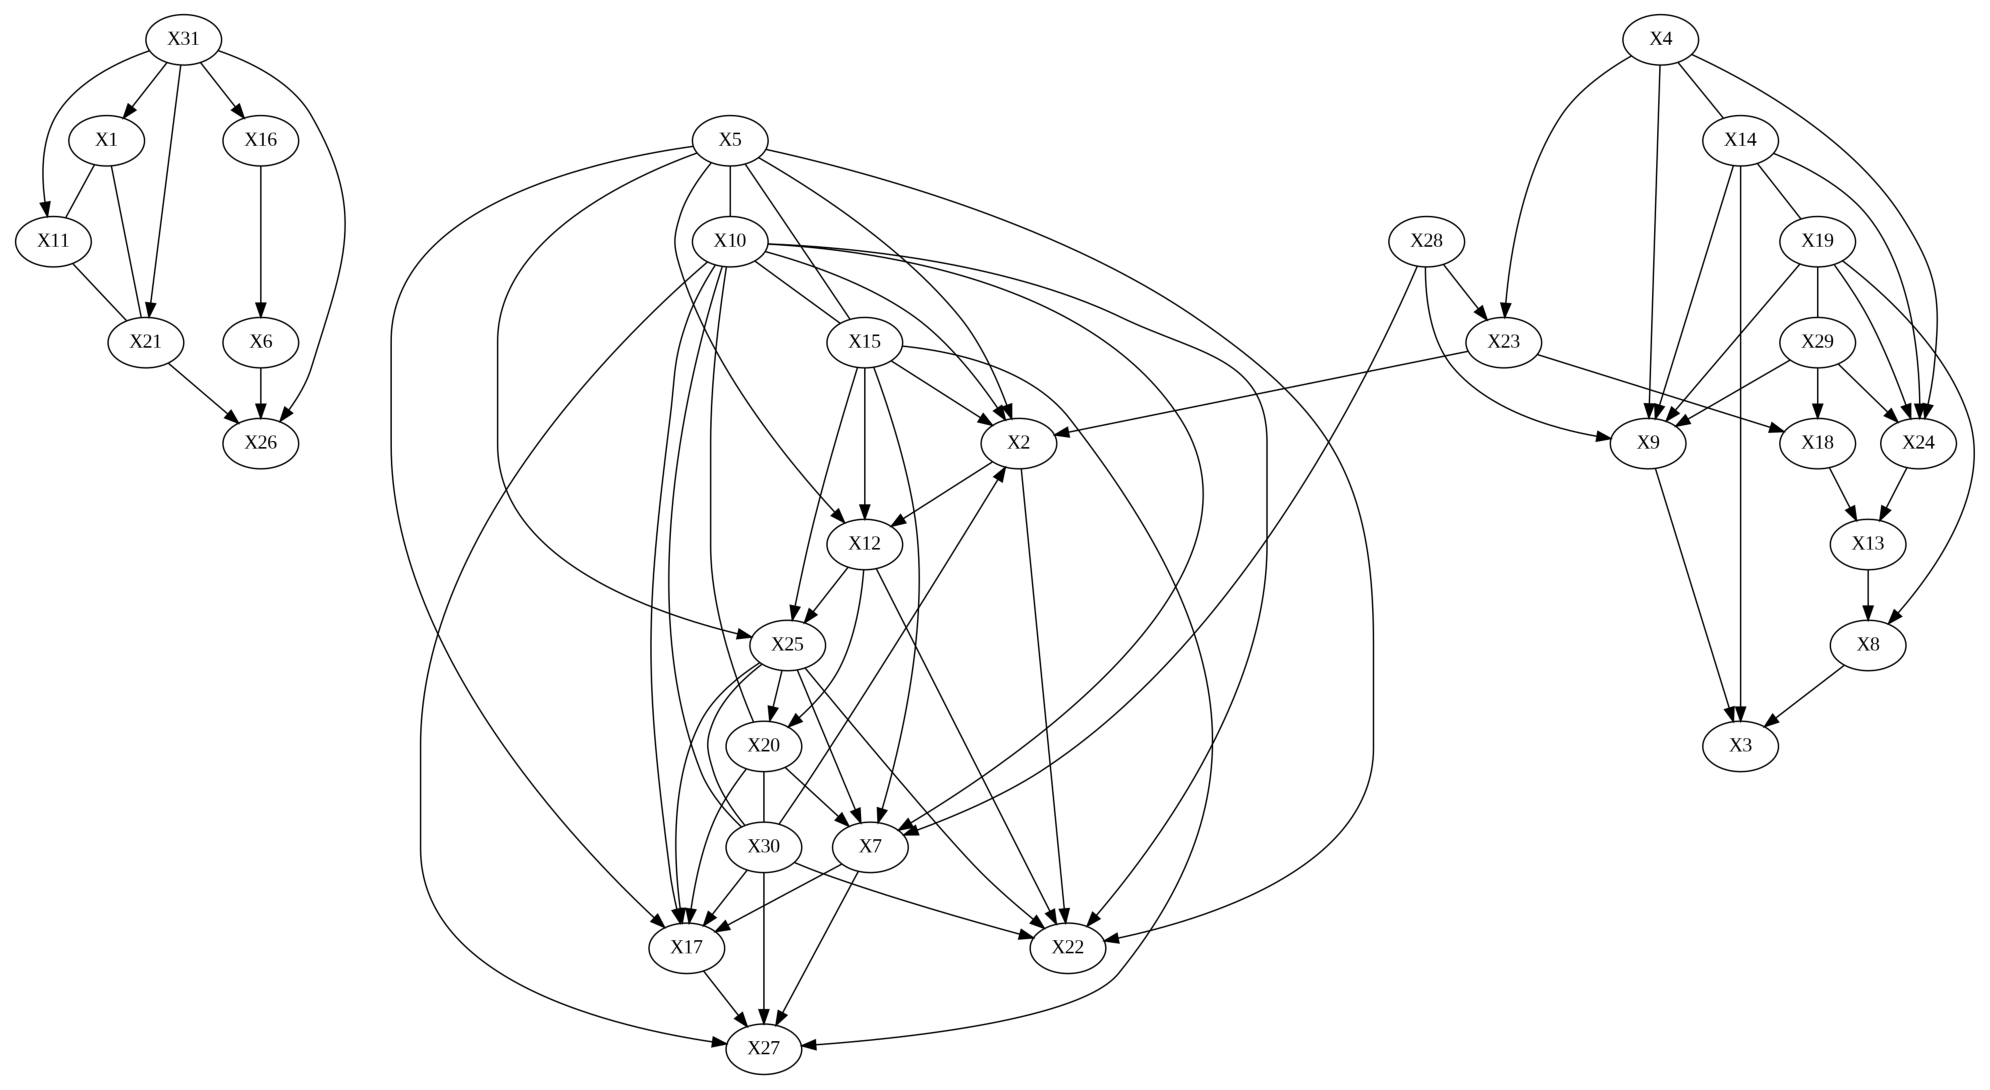

In [ ]:
c_indx = np.expand_dims(np.arange(syn_data_1d.shape[0]), axis=1)
cg = cdnod(syn_data_1d, c_indx, indep_test=fisherz)
cg.draw_pydot_graph()

In [ ]:
cg.G.graph

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
         0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0, -1,  0,  0,  1,  0,
         0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,
         0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0,
        -1,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,
        -1,  0,  0,  1,  0,  0,  0,  0,  1,  0, -1,  1,  0,  0,  0],
       [ 0,  

In [ ]:
cd_nod_g = cg.G.graph
cd_nod_full_graph = np.zeros((5,30))
for i in range(0, 30):
  for j in range (25, 29):
    if cd_nod_g[j,i]==1 and cd_nod_g[i,j]==-1:
       cd_nod_full_graph[j-25,i]=1
    if cd_nod_g[j,i]==1 and cd_nod_g[i,j]==1 and i>24:
       cd_nod_full_graph[j-25,i]=1
       cd_nod_full_graph[i-25,j]=1
    if cd_nod_g[j,i]==-1 and cd_nod_g[i,j]==-1 and i>24:
       cd_nod_full_graph[j-25,i]=1
       cd_nod_full_graph[i-25,j]=1


In [ ]:
cd_nod_full_graph

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
cdt.metrics.SHD(true_full_graph, cd_nod_full_graph)

16.0

In [ ]:
true_values = true_full_graph
predictions = cd_nod_full_graph

N = true_values.shape[1]*true_values.shape[0]
accuracy = (true_values == predictions).sum() / N
TP = ((predictions == 1) & (true_values == 1)).sum()
FP = ((predictions == 1) & (true_values == 0)).sum()
TN = ((predictions == 0) & (true_values == 0)).sum()
FN = ((predictions == 0) & (true_values == 1)).sum()
precision = TP / (TP+FP)
recall = TP / (TP + FN)
FDR = FP / (FP + TP)
F1 = 2 * (precision * recall) / (precision + recall)
print('Accuracy: {}, Precision: {}, Recall: {}, FDR: {}, F1 Score: {}'.format(accuracy, precision, recall, FDR,F1))

Accuracy: 0.8933333333333333, Precision: 0.0, Recall: 0.0, FDR: 1.0, F1 Score: nan


invalid value encountered in scalar divide
